# 1) To set up your own data cleaning pipeline

In [21]:
#Load the datasets
def read_dataset(name): #when only one dataset is provided as input
    import pandas as pd
    if name == "gpsa":
        df = pd.read_csv('../datasets/googleplaystore.csv', sep=',', encoding ='ISO-8859-1')
    elif name == "gpsu":
        df = pd.read_csv('../datasets/googleplaystore_reviews.csv', sep=',',encoding = 'ISO-8859-1')  
    elif name == "titanic":
        df = pd.read_csv('../datasets/titanic/titanic_train.csv', sep=',', encoding ='ISO-8859-1')
    elif name == "house":
        df = pd.read_csv('../datasets/house/house_train.csv', sep=',', encoding ='ISO-8859-1')
    else: 
        raise ValueError('Invalid dataset name')               
    return df


In [22]:
read_dataset("house").head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## - Loading your data

In [23]:
import learn2clean.loading.reader as rd 
import learn2clean.normalization.normalizer as nl 
import pandas as pd

# executing profiling function for one dataset as input
rd.profile_summary(read_dataset('house'), plot=False)


Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id    int64                  0.0              1460.0                   0       -1.2
1      MSSubClass    int64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea    int64                  0.0              1073.0             12.1951    202.544
4     OverallQual    int64                  0.0                10.0            0.216721  0.0918565
5     OverallCond    int64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt    int64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd    int64                  0.0                61.0           -0.503044     -1.272
8      MasVnrArea  float64                  8.0               328.0  2.6663261001607443   

In [24]:

read_dataset('house')['SalePrice'].head() # the target variable is numerical 


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [25]:

# no encoding of the target variable
d_not_enc = rd.Reader(sep=',',verbose=True, encoding=False) 

# when you have two datasets as inputs: train and test datasets
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')
house_not_encoded['train'].head()
house_not_encoded['test'].head()


Reading csv : house_train.csv ...
Reading data ...
CPU time: 8.659276723861694 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272
8 

CPU time: 0.3969879150390625 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64         

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,NaN,3.0,1Fam,TA,No,706.0,0.0,...,Normal,0.0,Pave,8.0,856.0,AllPub,0.0,2003.0,2003.0,2008.0
1,1262.0,0.0,0.0,NaN,3.0,1Fam,TA,Gd,978.0,0.0,...,Normal,0.0,Pave,6.0,1262.0,AllPub,298.0,1976.0,1976.0,2007.0
2,920.0,866.0,0.0,NaN,3.0,1Fam,TA,Mn,486.0,0.0,...,Normal,0.0,Pave,6.0,920.0,AllPub,0.0,2001.0,2002.0,2008.0
3,961.0,756.0,0.0,NaN,3.0,1Fam,Gd,No,216.0,0.0,...,Abnorml,0.0,Pave,7.0,756.0,AllPub,0.0,1915.0,1970.0,2006.0
4,1145.0,1053.0,0.0,NaN,4.0,1Fam,TA,Av,655.0,0.0,...,Normal,0.0,Pave,9.0,1145.0,AllPub,192.0,2000.0,2000.0,2008.0


In [26]:

# otherwise for only one dataset as input, 
# train_test_split function will split the input dataset into train/test dataset
house_train_only  = ["../datasets/house/house_train.csv"]
house_train_only_not_encoded = d_not_enc.train_test_split(house_train_only, 'SalePrice')
house_train_only_not_encoded['train'].head() 


Reading csv : house_train.csv ...
Reading data ...
CPU time: 0.4565010070800781 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272
8

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,437.0,50.0,RM,40.0,4400.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,10.0,2006.0,WD,Normal,116000.0
1,277.0,20.0,RL,129.0,9196.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,4.0,2010.0,WD,Normal,201000.0
2,223.0,60.0,RL,85.0,11475.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,MnPrv,NaN,0.0,2.0,2006.0,WD,Normal,179900.0
3,1361.0,70.0,RL,51.0,9842.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5.0,2008.0,WD,Normal,189000.0
4,1440.0,60.0,RL,80.0,11584.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,11.0,2007.0,WD,Normal,197000.0


## - Normalize your data

In [27]:
# >> Examples of normalization
# The choice for the normalizer : 'ZS', 'MM','DS' or 'Log10'
#    Available strategies=
#       - 'ZS' z-score normalization
#       - 'MM' MinMax scaling
#       - 'DS' decimal scaling
#       - 'Log10 log10 scaling

import learn2clean.normalization.normalizer as nl 

# MM normalization with exclude = None, all numeric variables will be normalized
n1= nl.Normalizer(house_not_encoded.copy(),strategy='MM',exclude=None, verbose =False)
print('"LotArea" original variable\n',house_not_encoded['train']['LotArea'].head())
print('"LotArea" normalized variable\n', n1.transform()['train']['LotArea'].head())

#n1.transform()['train']
n1.transform()['target'].head()

"LotArea" original variable
 0     8450.0
1     9600.0
2    11250.0
3     9550.0
4    14260.0
Name: LotArea, dtype: float64
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.11964797973632812 seconds

"LotArea" normalized variable
 0    0.033420
1    0.038795
2    0.046507
3    0.038561
4    0.060576
Name: LotArea, dtype: float64
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.06885313987731934 seconds



0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [28]:

#ZS normalization
n3= nl.Normalizer(house_not_encoded.copy(),strategy='ZS',exclude=None, verbose = False)
print('ZS normalized variables\n',n3.transform()['train'].head())

#DS scaling
n4= nl.Normalizer(house_not_encoded.copy(),strategy='DS',exclude=None, verbose = False)
print('DS normalized variables\n',n4.transform()['train'].head())

#Log10 scaling
n5= nl.Normalizer(house_not_encoded.copy(),strategy='Log10',exclude=None, verbose = False)
#print('Log10 normalized variables\n',n5.transform()['train'].head())
print('Log10 normalized variables none excluded in train dataset\n',n5.transform()['train']['LotArea'].head())
print('Log10 normalized variables none excluded in test dataset\n',n5.transform()['test']['LotArea'].head())

#Log10 scaling  excluding target variable 'SalePrice'
n6= nl.Normalizer(house_not_encoded.copy(),strategy='Log10',exclude='LotArea',verbose = False)

print('Log10 normalized variables LotArea excluded in train dataset \n',n6.transform()['train']['LotArea'].head())
print('Log10 normalized variables LotArea excluded  in test dataset \n',n6.transform()['test']['LotArea'].head())

n7= nl.Normalizer(house_not_encoded.copy(),strategy='Log10',exclude='Fare', verbose = False)
print('Log10 normalized variables none excluded\n', n5.transform()['train']['YearBuilt'].head())
print("Log10 normalized variables 'YearBuilt' excluded\n")
n7.transform()['train']['YearBuilt'].head()
# here YearBuilt is not excluded from normalization!



>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.10841012001037598 seconds

ZS normalized variables
    1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.848403  1.052216  -0.096683      0.173726    0.517456    -0.26242   
1  0.102724 -0.783841  -0.096683      0.173726    1.074978    -0.26242   
2 -0.698471  1.078016  -0.096683      0.173726    0.066519    -0.26242   
3 -0.602422  0.841521  -0.096683      0.173726   -0.486903    -0.26242   
4 -0.171369  1.480057  -0.096683      1.368545    0.412921    -0.26242   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  MasVnrType  \
0      1.092515     -0.216996  -0.988889      -0.332775  ...     BrkFace   
1     -0.809382      4.271883  -0.707401      -0.332775  ...        None   
2      1.092515     -0.216996  -0.392303      -0.332775  ...     BrkFace   
3      1.092515     -0.216996  -0.169633       4.429569  ...        None  

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: YearBuilt, dtype: float64

In [29]:
# To prevent that and avoid normalization for more than one numeric or year/month/date variables, 
# please change the data type into 'object' data type right after loading 
# and before normalization and learn2clean pipeline

house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')

# not exhaustively
house_not_encoded['train']['YrSold'] = house_not_encoded['train']['YrSold'].astype('object')
house_not_encoded['train']['YearBuilt'] = house_not_encoded['train']['YearBuilt'].astype('object')
house_not_encoded['train']['MoSold'] = house_not_encoded['train']['MoSold'].astype('object')
house_not_encoded['train']['MiscVal'] = house_not_encoded['train']['MiscVal'].astype('object')
house_not_encoded['train']['GarageYrBlt'] = house_not_encoded['train']['GarageYrBlt'].astype('object')
house_not_encoded['train']['YearRemodAdd'] = house_not_encoded['train']['YearRemodAdd'].astype('object')

normalized_house = nl.Normalizer(house_not_encoded.copy(),strategy='DS',exclude='SalePrice', verbose = False).transform()
normalized_house['train'].head()




Reading csv : house_train.csv ...
Reading data ...
CPU time: 0.44603514671325684 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272


CPU time: 0.2420969009399414 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64         

>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.12186503410339355 seconds



,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,Street,Utilities,YearBuilt,YearRemodAdd,YrSold
0,0.214625,0.804668,0.0,0.555556,0.720148,0.0,0.777778,0.000000,0.146572,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,2003,2003,2008
1,0.585304,0.000000,0.0,0.555556,0.823787,0.0,0.000000,0.944444,0.257407,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,1976,1976,2007
2,0.287037,0.810476,0.0,0.555556,0.605848,0.0,0.777778,0.000000,0.396296,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,2001,2002,2008
3,0.334201,0.754013,0.0,0.555556,0.458662,0.0,0.777778,0.000000,0.486698,0.937276,...,Y,NaN,CompShg,Gable,Abnorml,Pave,AllPub,1915,1970,2006
4,0.491358,0.891568,0.0,0.888889,0.696634,0.0,0.777778,0.000000,0.447574,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,2000,2000,2008


## - Replace missing values

In [32]:
#>> Examples for missing value imputation
# Available strategies:
#            - 'EM': only for numerical variables; imputation based on
#                expectation maximization
#            - 'MICE': only for numerical variables  missing at random (MAR);
#                Multivariate Imputation by Chained Equations
#            - 'KNN', only for numerical variables; k-nearest neighbor
#                imputation (k=4) which weights samples using the mean squared
#                difference on features for which two rows both have observed
#                data
#            - 'RAND', 'MF': both for numerical and categorical variables;
#                replace missing values by randomly selected value in the 
#                variable domain or by the most frequent value in the variable
#                domain respectively
#            - 'MEAN', 'MEDIAN': only for numerical variables; replace missing
#                values by mean or median of the numerical variable respectvely
#            - or 'DROP' remove the row with at least one missing value

import learn2clean.imputation.imputer as imp

# replace missing values by the most frequent ones in the training and testing datasets

print('Number of missing values',normalized_house['train'].isnull().sum().sum()) 
imp1 = imp.Imputer(normalized_house.copy(),strategy='MF', verbose=True).transform()
imp2 = imp.Imputer(normalized_house.copy(),strategy='RAND', verbose=True).transform()
imp3 = imp.Imputer(normalized_house.copy(),strategy='DROP', verbose=True).transform()
imp4 = imp.Imputer(normalized_house.copy(),strategy='MEAN', verbose=True).transform() 
imp5 = imp.Imputer(normalized_house.copy(),strategy='KNN', verbose=True).transform()
imp6 = imp.Imputer(normalized_house.copy(),strategy='MEDIAN', verbose=True).transform()
imp6 = imp.Imputer(normalized_house.copy(),strategy='EM', verbose=True).transform()
imp6 = imp.Imputer(normalized_house.copy(),strategy='MICE', verbose=True).transform()


Number of missing values 63868
>>Imputation 
* For train dataset
Before imputation:
Total 63868 missing values in ['LotFrontage', 'MasVnrArea', 'Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
- 2356 numerical missing values in ['LotFrontage', 'MasVnrArea']
- 61512 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
Most frequent value for  1stFlrSF is: 0.2222222222222222
Most frequent value for  2ndFlrSF is: 0.0
Most frequent value for  3SsnPorch is: 0.0
Most frequent value for  BedroomAbvGr is: 0.5555555555555555
Most frequent value for  BsmtFinSF1 is: 0.0
Most frequent value for  BsmtFinSF2 is: 0

Before imputation:
Total 63868 missing values in ['LotFrontage', 'MasVnrArea', 'Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
- 2356 numerical missing values in ['LotFrontage', 'MasVnrArea']
- 61512 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
After imputation:
Total 0 missing values
- 0 numerical missing values
- 0 non-numerical missing values
* For test dataset
Before imputation:
Total 13964 missing values in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'Alley', 'BsmtCond', 

KeyboardInterrupt: 

## - Detect outliers and remove them

In [31]:
# >> Examples for outlier detection and removal
# Available strategies =
#            'ZS': detects outliers using the robust Zscore as a function
#            of median and median absolute deviation (MAD)
#            'IQR': detects outliers using Q1 and Q3 +/- 1.5*InterQuartile Range
#            'LOF': detects outliers using Local Outlier Factor

                
import learn2clean.outlier_detection.outlier_detector as out

#to remove rows having 30% and more ZSB-based outling values among the numerical variables
out1=out.Outlier_detector(house_not_encoded.copy(), strategy='ZSB', threshold = .3, verbose=True)
out1.transform()

#to remove rows having at least one IQR-based outlying value using threshold '-1'
out2=out.Outlier_detector(house_not_encoded.copy(), strategy='IQR', threshold = -1, verbose=False)
out2.transform()

#to remove rows having 40% and more ZSB-based outling values among the numerical variables; 
# since LOF requires non missing values, rows with NaN are also removed
out3=out.Outlier_detector(house_not_encoded.copy(), strategy='LOF', threshold = .4, verbose=False)
out3.transform()



>>Outlier detection and removal:
* For train dataset
900 outlying rows have been removed:
with indexes: [53, 58, 159, 165, 185, 197, 304, 320, 321, 344, 349, 363, 378, 389, 417, 434, 440, 490, 496, 520, 523, 527, 529, 533, 591, 614, 635, 642, 649, 654, 661, 664, 691, 718, 745, 747, 769, 798, 803, 825, 898, 1024, 1046, 1067, 1068, 1142, 1169, 1173, 1182, 1184, 1228, 1230, 1243, 1268, 1270, 1298, 1313, 1350, 1373, 1386, 1449, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 2023, 2024, 2025, 2027, 2028, 2029, 2031, 2034, 2127, 2137, 2141, 2163, 2164, 2165, 2170, 2171, 2173, 2176, 2178, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 3

13260 outlying rows have been removed
* For test dataset
2919 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.09659528732299805 seconds


>>Outlier detection and removal:
* For train dataset
LOF requires no missing values, so missing values have been removed using DROP.
Error: Need at least one continous variable forLOF outlier detection
 Dataset inchanged
* For test dataset
LOF requires no missing values, so missing values have been removed using DROP.
Error: Need at least one continous variable forLOF outlier detection
 Dataset inchanged
Outlier detection and removal done -- CPU time: 0.05648994445800781 seconds



{'train': Empty DataFrame
 Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, Alley, BedroomAbvGr, BldgType, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, CentralAir, Condition1, Condition2, Electrical, EnclosedPorch, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Fireplaces, Foundation, FullBath, Functional, GarageArea, GarageCars, GarageCond, GarageFinish, GarageQual, GarageType, GarageYrBlt, GrLivArea, HalfBath, Heating, HeatingQC, HouseStyle, Id, KitchenAbvGr, KitchenQual, LandContour, LandSlope, LotArea, LotConfig, LotFrontage, LotShape, LowQualFinSF, MSSubClass, MSZoning, MasVnrArea, MasVnrType, MiscFeature, MiscVal, MoSold, Neighborhood, OpenPorchSF, OverallCond, OverallQual, PavedDrive, PoolArea, PoolQC, RoofMatl, RoofStyle, SaleCondition, ScreenPorch, Street, TotRmsAbvGrd, TotalBsmtSF, Utilities, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold]
 Index: []
 
 [0 rows x 79 columns],
 'test': Em

## - Detect duplicates and remove them

In [33]:
# >> Examples for duplicate detection and removal
# House dataset has no duplicate anyway
# Available strategies =
#        'ED':  exact duplicate detection/removal or
#        'AD':  for aproximate duplicate records detection and removal
#        based on Jaccard similarity 


# import the Duplicate_detector class
import learn2clean.duplicate_detection.duplicate_detector as dup

#Remove exact duplicates with 'ED' strategy of the Duplicate_detector class

dup.Duplicate_detector(house_not_encoded.copy(), strategy='ED', verbose=False).transform()

#Remove approximate duplicates with thresholding Jaccard similarity 
# using 'AD'strategy of the Duplicate_detector class
dup.Duplicate_detector(house_not_encoded.copy(), strategy='AD', threshold = .5, verbose=False).transform()



>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 13260
After deduplication: Number of rows: 1460
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplication done -- CPU time: 0.19132280349731445 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 3.288017988204956 seconds



{'train':        1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
 0         856.0     854.0        0.0   NaN           3.0     1Fam       TA   
 1        1262.0       0.0        0.0   NaN           3.0     1Fam       TA   
 2         920.0     866.0        0.0   NaN           3.0     1Fam       TA   
 3         961.0     756.0        0.0   NaN           3.0     1Fam       Gd   
 4        1145.0    1053.0        0.0   NaN           4.0     1Fam       TA   
 ...         ...       ...        ...   ...           ...      ...      ...   
 13255    2444.0    1872.0        0.0   NaN           4.0     1Fam       TA   
 13256    2444.0    1872.0        0.0   NaN           4.0     1Fam       TA   
 13257    2444.0    1872.0        0.0   NaN           4.0     1Fam       TA   
 13258    2444.0    1872.0        0.0   NaN           4.0     1Fam       TA   
 13259    2444.0    1872.0        0.0   NaN           4.0     1Fam       TA   
 
       BsmtExposure  BsmtFinSF1  BsmtFinS

## - Detect inconsistencies

In [34]:
# >> Examples for inconsistency detection 
# Available consistency checking strategies :
#            - 'CC': checks whether the data satisfy the constraints
#                specified in a 'file_name'_constraint.tdda stored in 'save' directory
#            - 'PC': checks whether the data satisfy the patterns
#                specified in 'file_name'_patterns.txt stored in 'save' directory

# import the Consistency_checker class                
import learn2clean.consistency_checking.consistency_checker as cc
import learn2clean.loading.reader as rd 
d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')
            
# discover the constraints from the input (train) dataset and store them in a file entitled 'house_discovered'_constraint.tdda in the 'save' directory
#cc.constraint_discovery(read_dataset('house'), file_name='house_discovered')

# discover the patterns from the input (train) dataset and store them in a file entitled 'house_discovered'_patterns.txt in the 'save' directory
#cc.pattern_discovery(read_dataset('house'), file_name='house_discovered')

# detect pattern violations with respect to a given file of patterns entitled 'house_example'_constraint.tdda" stored in the 'save' directory
#cc.Consistency_checker(house_not_encoded, strategy='CC', file_name='house_example',verbose=True).transform()

# detect pattern violations with respect to a given file of patterns entitled 'house_example1'_patterns.txt" stored in the 'save' directory
# with too strong patterns resulting in an empty dataframe fro the training set
cc.Consistency_checker(house_not_encoded, strategy='PC', file_name='house_example1', verbose=False).transform()

# detect pattern violations with respect to a given file of patterns entitled 'house_example2'_patterns.txt" stored in the 'save' directory
cc.Consistency_checker(house_not_encoded, strategy='PC', file_name='house_example2', verbose=False).transform()


>>Consistency checking
* For train dataset
Number of pattern violations on variable ' MSZoning 'for pattern# 0 : 11603
Number of pattern violations on variable ' MSZoning 'for pattern# 1 : 2684
Number of pattern violations on variable ' SaleCondition 'for pattern# 0 : 2872
No record from the dataset satisfied the patterns!
Will return empty dataset - please change our patterns
* For test dataset
Number of pattern violations on variable ' MSZoning 'for pattern# 0 : 2459
Number of pattern violations on variable ' MSZoning 'for pattern# 1 : 654
Number of pattern violations on variable ' SaleCondition 'for pattern# 0 : 447
Consistency checking done -- CPU time: 0.1105508804321289 seconds
>>Consistency checking
* For train dataset
No violation on variable ' SaleCondition ' for pattern# 0 as '^[A-Za-z]{5,6}$'
No record from the dataset satisfied the patterns!
Will return empty dataset - please change our patterns
* For test dataset
No violation on variable ' SaleCondition ' for pattern# 0 as

{'train': Empty DataFrame
 Columns: [Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, Street, Utilities]
 Index: []
 
 [0 rows x 42 columns],
 'test':      Alley BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
 2904   NaN     1Fam      NaN          NaN          NaN          NaN      NaN   
 2250   NaN     1Fam       TA           No          Unf          Unf       TA   
 1915   NaN     1Fam      NaN          NaN          NaN          NaN      NaN   
 
      CentralAir Condition1 Condition2  ... MasVnrType MiscFeature  \
 2904          Y     Artery       Norm 

## - Select features

In [35]:
# >> Examples for Feature selection
# Available strategies=
#           'MR': using a default threshold on the missing ratio per variable,
#            i.e., variables with 20% (by default) and more missing values
#            are removed
#            'LC': detects pairs of linearly correlated variables and remove one
#            'VAR': uses threshold on the variance
#            'Tree': uses decision tree classification as model for feature
#                selection given the target set for classification task
#                'SVC': uses linear SVC as model for feature selection given
#                 the target set for classification task
#            'WR': uses the selectKbest (k=10) and Chi2 for feature selection
#                given the target set for classification task
#            'L1': uses Lasso L1 for feature selection given the target set for
#                regression task
#            'IMP': uses Random Forest regression for feature selection given
#                the target set for regression task

                
import learn2clean.feature_selection.feature_selector as fs
import learn2clean.loading.reader as rd 
d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')
  
#Available strategies for feature selection 
#        'MR': using a default threshold on the missing ratio per variable, i.e., variables
#                with 20% (by default) and more missing values are removed
#        'LC': detects pairs of linearly correlated variables and remove one
#        'VAR': uses threshold on the variance
#        'Tree': uses decision tree classification as model for feature selection given the target set for classification task
#        'SVC': uses linear SVC as model for feature selection given the target set for classification task
#        'WR': uses the selectKbest (k=10) and Chi2 for feature selection given the target set for classification task
#        'L1': uses Lasso L1 for feature selection given the target set for regression task
#        'IMP': uses Random Forest regression for feature selection given the target set for regression task

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'MR', threshold=0.1, exclude=None, verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'LC', threshold=0.2,  exclude=None, verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'L1',  exclude= None, threshold=.3,verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'IMP', exclude = 'SibSp',verbose=True, threshold=.4).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'Tree',  exclude='Pclass',verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'WR', exclude= None, verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'WR', exclude= 'Sex', verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'SVC',  exclude=None).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'VAR',  exclude=None).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'VAR',  exclude='Cabin').transform()



>>Feature selection 
Before feature selection:
79 features 
Apply MR feature selection with missing threshold= 0.1
              missing_fraction
PoolQC                0.995928
MiscFeature           0.964555
Alley                 0.942911
Fence                 0.839291
FireplaceQu           0.435294
...                        ...
HeatingQC             0.000000
HouseStyle            0.000000
Id                    0.000000
KitchenAbvGr          0.000000
YrSold                0.000000

[79 rows x 1 columns]
6 features with greater than 0.10 missing values.

List of variables to be removed : ['Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'MiscFeature', 'PoolQC']
List of variables to be keep
['LotShape', 'BsmtExposure', 'BsmtUnfSF', 'LotConfig', 'MasVnrType', 'MasVnrArea', 'HeatingQC', 'WoodDeckSF', 'Exterior2nd', 'BsmtFinType1', 'LotArea', 'EnclosedPorch', 'ExterQual', 'BsmtCond', 'KitchenQual', 'BsmtFinSF1', '1stFlrSF', 'LandContour', 'CentralAir', 'Exterior1st', 'Electrical', 'GarageF

Apply L1 feature selection with threshold= 0.3


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5925179100196.432, tolerance: 1092850854905.2756
  positive)


After feature selection:
26 features remain
['YrSold', 'Fireplaces', 'MSSubClass', 'BsmtUnfSF', 'MasVnrArea', 'TotRmsAbvGrd', 'BedroomAbvGr', 'PoolArea', 'BsmtFinSF1', 'YearBuilt', '1stFlrSF', 'OverallCond', 'GarageCars', 'FullBath', 'HalfBath', 'MoSold', '2ndFlrSF', 'OverallQual', 'LowQualFinSF', 'ScreenPorch', 'YearRemodAdd', 'LotFrontage', 'BsmtFullBath', 'BsmtFinSF2', 'KitchenAbvGr', '3SsnPorch']
Feature selection done -- CPU time: 1.0878777503967285 seconds


>>Feature selection 
Before feature selection:
79 features 
Apply IMP feature selection with threshold= 0.4
Exclude variable invalid. Please choose a variablefrom the input training dataset.
After feature selection:
22 features remain
['Fireplaces', 'BsmtUnfSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'LotArea', 'BedroomAbvGr', 'BsmtFinSF1', 'YearBuilt', 'OpenPorchSF', 'GarageYrBlt', '1stFlrSF', 'OverallCond', 'GarageCars', 'Id', 'GrLivArea', 'MoSold', '2ndFlrSF', 'OverallQual', 'YearRemodAdd', 'LotFrontage', 'GarageArea', 'TotalBsmtSF

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


After feature selection:
28 features remain
['YrSold', 'MSSubClass', 'BsmtUnfSF', 'MasVnrArea', 'WoodDeckSF', 'LotArea', 'MiscVal', 'EnclosedPorch', 'PoolArea', 'BsmtFinSF1', 'YearBuilt', 'OpenPorchSF', 'GarageYrBlt', '1stFlrSF', 'OverallCond', 'Id', 'GrLivArea', 'MoSold', '2ndFlrSF', 'OverallQual', 'LowQualFinSF', 'ScreenPorch', 'YearRemodAdd', 'LotFrontage', 'GarageArea', 'BsmtFinSF2', 'TotalBsmtSF', '3SsnPorch']
Feature selection done -- CPU time: 177.15066170692444 seconds


>>Feature selection 
Before feature selection:
79 features 
Apply VAR feature selection with threshold= 0.3
After feature selection:
37 features remain
['YrSold', 'Fireplaces', 'MSSubClass', 'BsmtUnfSF', 'MasVnrArea', 'TotRmsAbvGrd', 'WoodDeckSF', 'LotArea', 'BedroomAbvGr', 'MiscVal', 'EnclosedPorch', 'PoolArea', 'BsmtFinSF1', 'YearBuilt', 'OpenPorchSF', 'GarageYrBlt', '1stFlrSF', 'OverallCond', 'GarageCars', 'FullBath', 'HalfBath', 'Id', 'GrLivArea', 'MoSold', '2ndFlrSF', 'OverallQual', 'LowQualFinSF', 'BsmtHa

{'train':        1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
 0           856       854          0   NaN             3     1Fam       TA   
 1          1262         0          0   NaN             3     1Fam       TA   
 2           920       866          0   NaN             3     1Fam       TA   
 3           961       756          0   NaN             3     1Fam       Gd   
 4          1145      1053          0   NaN             4     1Fam       TA   
 ...         ...       ...        ...   ...           ...      ...      ...   
 13255      2444      1872          0   NaN             4     1Fam       TA   
 13256      2444      1872          0   NaN             4     1Fam       TA   
 13257      2444      1872          0   NaN             4     1Fam       TA   
 13258      2444      1872          0   NaN             4     1Fam       TA   
 13259      2444      1872          0   NaN             4     1Fam       TA   
 
       BsmtExposure  BsmtFinSF1  BsmtFinS

## >> Classification 

In [36]:
import learn2clean.classification.classifier as cl
#output is accuracy of classification for k=10 cross-validation and execution time 
#plus a detailed classification report if verbose = True
import learn2clean.loading.reader as rd 
d_enc = rd.Reader(sep=',',verbose=False, encoding=True) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_encoded = d_enc.train_test_split(house, 'SaleCondition')


Cl1 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'LDA', verbose = False).transform()
Cl2 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'MNB',verbose = False).transform()
Cl3 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'NB',verbose = False).transform()
Cl4 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'CART',verbose = True).transform()



>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.6433522428010717

Classification done -- CPU time: 0.9672167301177979 seconds

>>Classification task
Accuracy of Multinomial Naive Bayes classification for 10 cross-validation : 0.435

Classification done -- CPU time: 36.10856223106384 seconds

>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.4325866707402975

Classification done -- CPU time: 0.3548407554626465 seconds

>>Classification task
{'mean_fit_time': array([0.03363485, 0.03136792, 0.03772643, 0.05754664, 0.0497247 ]), 'std_fit_time': array([0.01458458, 0.00097457, 0.00091657, 0.00801484, 0.00301542]), 'mean_score_time': array([0.00269732, 0.002142  , 0.00221531, 0.00334129, 0.00242662]), 'std_score_time': array([2.54740566e-04, 1.52180545e-05, 1.29350816e-04, 1.35930578e-03,
       1.51397863e-04]), 'param_max_depth': masked_array(data=[3, 5, 7, 9, 10],
             mask=[False, False, False, False, False],


## >> Regression

In [37]:
import learn2clean.regression.regressor as rg
# output is MSE and computation time, with regression summary if verbose = True

import learn2clean.loading.reader as rd 
d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')
  
    
rg1 = rg.Regressor(dataset = house_not_encoded,target = 'SalePrice',strategy= 'LASSO', verbose = True).transform()

rg3 = rg.Regressor(dataset = house_not_encoded,target = 'SalePrice',strategy= 'OLS',verbose = True).transform()

rg2 = rg.Regressor(dataset = house_not_encoded,target = 'SalePrice',strategy= 'MARS',verbose = True).transform()



>>Regression task


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7227313836020.991, tolerance: 52377346341.4417
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7219996132503.403, tolerance: 52377346341.4417
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7213177499909.999, tolerance: 52377346341.4417
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_m

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5931719784382.485, tolerance: 52943490705.768906
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7751888058067.804, tolerance: 51606843812.8431
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7741949033717.17, tolerance: 51606843812.8431
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8097945397003.559, tolerance: 56652006720.674
  positive)


MSE values of cross validation
[[1.74292982e+09 9.40168331e+08 9.38595578e+08 7.35175528e+08
  1.54649407e+09 4.79784384e+09 7.30612017e+08 9.14325116e+08
  9.30789318e+08 1.57810183e+10]
 [1.74120098e+09 9.40322568e+08 9.34299461e+08 7.29883881e+08
  1.54825533e+09 4.80194443e+09 7.33216112e+08 9.11236369e+08
  9.28752132e+08 1.57860224e+10]
 [1.73936076e+09 9.38091114e+08 9.28770403e+08 7.25386345e+08
  1.54877793e+09 4.80889842e+09 7.35022369e+08 9.08181977e+08
  9.26160018e+08 1.57980251e+10]
 [1.73764982e+09 9.36062455e+08 9.23552713e+08 7.21120307e+08
  1.54934605e+09 4.81566863e+09 7.36840705e+08 9.05258127e+08
  9.23694219e+08 1.58099695e+10]
 [1.73606571e+09 9.34224750e+08 9.18612283e+08 7.17074674e+08
  1.54993189e+09 4.82222018e+09 7.38648361e+08 9.02461075e+08
  9.21344519e+08 1.58218769e+10]
 [1.73460146e+09 9.32561335e+08 9.13926877e+08 7.13238539e+08
  1.55052224e+09 4.82854485e+09 7.40433679e+08 8.99785360e+08
  9.19103503e+08 1.58337482e+10]
 [1.73324863e+09 9.31058674

const           -1.797251e+06
1stFlrSF         1.080830e+01
2ndFlrSF         1.200120e+01
3SsnPorch        9.429484e+01
BedroomAbvGr    -1.397077e+04
BsmtFinSF1       1.795334e+01
BsmtFinSF2       7.010186e-01
BsmtFullBath     5.054249e+03
BsmtHalfBath     3.148959e+03
BsmtUnfSF       -3.014519e+00
EnclosedPorch    1.039747e+00
Fireplaces       5.567932e+03
FullBath         8.754996e+03
GarageArea       5.365124e+00
GarageCars       1.450375e+04
GarageYrBlt      4.455461e+00
GrLivArea        3.621909e+01
HalfBath         1.940660e+03
Id               4.281748e-01
KitchenAbvGr    -2.089724e+04
LotArea          4.359244e-01
LotFrontage     -4.266506e+01
LowQualFinSF     1.340960e+01
MSSubClass      -2.033485e+02
MasVnrArea       4.417589e+01
MiscVal         -1.906911e+00
MoSold          -8.224429e+02
OpenPorchSF     -2.923347e+01
OverallCond      5.853765e+03
OverallQual      2.015986e+04
PoolArea         1.822333e+02
ScreenPorch      5.916045e+01
TotRmsAbvGrd     7.950533e+03
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,...,5,7,0,0,8,856.0,0,2003,2003,2008
1,1.0,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
2,1.0,920,866,0,3,486.0,0.0,1.0,0.0,434.0,...,5,7,0,0,6,920.0,0,2001,2002,2008
3,1.0,961,756,0,3,216.0,0.0,1.0,0.0,540.0,...,5,7,0,0,7,756.0,0,1915,1970,2006
4,1.0,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,...,5,8,0,0,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,1.0,1360,0,0,3,119.0,344.0,1.0,0.0,641.0,...,5,5,0,0,8,1104.0,160,1969,1979,2006
2912,1.0,546,546,0,3,408.0,0.0,0.0,0.0,138.0,...,5,4,0,0,5,546.0,0,1970,1970,2006
2915,1.0,546,546,0,3,252.0,0.0,0.0,0.0,294.0,...,5,4,0,0,6,546.0,0,1970,1970,2006
2916,1.0,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,...,7,5,0,0,7,1224.0,474,1960,1996,2006


(38,)

(2267, 38)

(38,)

(2267, 38)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1707.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        06:53:17   Log-Likelihood:            -1.2291e+05
No. Observations:               10241   AIC:                         2.459e+05
Df Residuals:                   10205   BIC:                         2.462e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.797e+06   6.11e+

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

Earth Model
-------------------------------------------
Basis Function        Pruned  Coefficient  
-------------------------------------------
(Intercept)           No      -517185      
OverallQual           No      20245.2      
h(GrLivArea-4676)     Yes     None         
h(4676-GrLivArea)     No      -47.7167     
BsmtFinSF1            No      27.1493      
h(TotalBsmtSF-3138)   No      -244.974     
h(3138-TotalBsmtSF)   No      -16.0507     
GarageCars            No      14410.9      
MSSubClass            No      -164.252     
MasVnrArea            No      47.6688      
h(PoolArea-555)       No      -2604.24     
h(555-PoolArea)       No      -344.993     
YearRemodAdd          No      440.065      
LotArea               No      0.523809     
h(EnclosedPorch-386)  No      -1620.92     
h(386-EnclosedPorch)  Yes     None         
BedroomAbvGr          No      -11593.9     
TotRmsAbvGrd          No      7757.43      
h(KitchenAbvGr-2)     No      -76343.2     
h(2-KitchenAbvGr)   

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1

## >> Clustering

In [38]:
import learn2clean.clustering.clusterer as ct
# clustering is applied to one dataset (i.e., the training set if two datasets are given in the path)
# output is silhouette, best k, and computation time, plus the training dataset with cluster IDs

ct.Clusterer(dataset = house_not_encoded,strategy= 'KMEANS', verbose=True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', verbose = True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', metric= 'euclidean', verbose = True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', metric= 'cosine', verbose = True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', metric= 'cityblock', verbose = True).transform()



>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.9735  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.9735
Labels distribution:
0    10221
1       20
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 14.266549110412598 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.9735  for k= 2
Quality of clustering 0.9735
Labels distribution:
0    10221
1       20
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 35.48118710517883 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.9735  for k= 2
Quality of clustering 0.9735
Labels distribution:
0    10221
1       20
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 31.09927988052368 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.9735  for k= 2
Quality of clustering 0.2975
Labels distribution:
1    9278
0     963
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 32.69798517227173 seconds

>>Clustering task
No

{'quality_metric': 0.9735,
 'result': {'train':        1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
  0           856       854          0             3         706           0   
  1          1262         0          0             3         978           0   
  2           920       866          0             3         486           0   
  3           961       756          0             3         216           0   
  4          1145      1053          0             4         655           0   
  ...         ...       ...        ...           ...         ...         ...   
  13255      2444      1872          0             4        1455           0   
  13256      2444      1872          0             4        1455           0   
  13257      2444      1872          0             4        1455           0   
  13258      2444      1872          0             4        1455           0   
  13259      2444      1872          0             4        1455          

## - Create your own pipeline

In [39]:
# create your preprocessing pipeline for classification

import learn2clean.loading.reader as rd 
import learn2clean.normalization.normalizer as nl 
import learn2clean.feature_selection.feature_selector as fs
import learn2clean.duplicate_detection.duplicate_detector as dd
import learn2clean.outlier_detection.outlier_detector as od
import learn2clean.imputation.imputer as imp
import learn2clean.classification.classifier as cl

d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
dataset= d_not_enc.train_test_split(house, 'SaleCondition')
  
# not exhaustively
dataset['train']['YrSold'] = dataset['train']['YrSold'].astype('object')
dataset['train']['YearBuilt'] = dataset['train']['YearBuilt'].astype('object')
dataset['train']['MoSold'] = dataset['train']['MoSold'].astype('object')
dataset['train']['MiscVal'] = dataset['train']['MiscVal'].astype('object')
dataset['train']['GarageYrBlt'] = dataset['train']['GarageYrBlt'].astype('object')
dataset['train']['YearRemodAdd'] = dataset['train']['YearRemodAdd'].astype('object')

# eliminate variables with more than30% missing values
d1 = fs.Feature_selector(dataset=dataset.copy(),strategy= 'MR', threshold=.3).transform()
# replace numeric null values by mean 
d2 = imp.Imputer(d1.copy(), strategy = 'MEAN',verbose=False).transform()
# replace remaining non numerical values by the most frequent
d2 = imp.Imputer(d2.copy(), strategy = 'MF',verbose=False).transform()
# eliminate 40 LOF outliers
d4 = od.Outlier_detector(d2, strategy='LOF', threshold= 0.4,verbose=False).transform()
# classify with LDA
cl.Classifier(d4,strategy = 'LDA', target = 'SaleCondition', verbose =True).transform()



>>Feature selection 
Before feature selection:
78 features 
Apply MR feature selection with missing threshold= 0.3
5 features with greater than 0.30 missing values.

List of variables to be removed : ['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC']
After feature selection:
73 features remain
['YrSold', 'Condition1', 'LotShape', 'BsmtExposure', 'PavedDrive', 'ExterCond', 'Fireplaces', 'MSSubClass', 'BsmtUnfSF', 'LotConfig', 'MasVnrType', 'MasVnrArea', 'HeatingQC', 'TotRmsAbvGrd', 'WoodDeckSF', 'Exterior2nd', 'BsmtFinType1', 'LotArea', 'BedroomAbvGr', 'BsmtQual', 'MiscVal', 'EnclosedPorch', 'ExterQual', 'PoolArea', 'BsmtCond', 'BsmtFinType2', 'KitchenQual', 'BsmtFinSF1', 'RoofStyle', 'YearBuilt', 'OpenPorchSF', 'GarageYrBlt', '1stFlrSF', 'Functional', 'LandContour', 'OverallCond', 'CentralAir', 'GarageCars', 'BldgType', 'Exterior1st', 'FullBath', 'Condition2', 'Electrical', 'GarageFinish', 'LandSlope', 'HalfBath', 'Id', 'GrLivArea', 'Heating', 'HouseStyle', 'MoSold', '2ndFlrSF

{'quality_metric': 0.6303939353805869}

# Learn2clean data preprocessing pipeline

## Regression with Learn2Clean


Reading csv : house_train.csv ...
Reading data ...
CPU time: 3.187898874282837 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272
8 

Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64                 15.0               304.0     

0 0
>>Imputation 
* For train dataset
Before imputation:
Total 63868 missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC']
- 2356 numerical missing values in ['LotFrontage', 'MasVnrArea']
- 61512 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
After imputation:
Total 0 missing values
- 0 numerical missing values
- 0 non-numerical missing values
* For test dataset
Before imputation:
Total 13964 missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'B

Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.4882030487060547 seconds


>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.13854975230522867
Regression done -- CPU time: 10.20690107345581 seconds
End Pipeline CPU time: 11.767833948135376 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> AD -> MARS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 2.559004783630371 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.6329281330108643 seconds


>>Regression task
MSE 

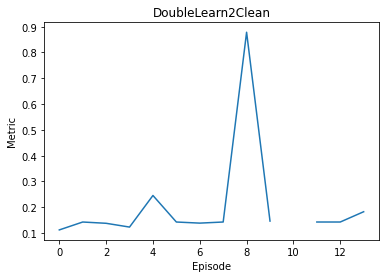

In [19]:
import learn2clean.loading.reader as rd 
import learn2clean.qlearning.qlearner as ql
import learn2clean.imputation.imputer as imp

# the results of learn2clean cleaning are stored in 'house_example'_results.txt in 'save' directory

d_not_enc = rd.Reader(sep=',',verbose=True, encoding=False) 
house  = ["../datasets/house/house_train.csv","../datasets/house/test.csv"]
dataset= d_not_enc.train_test_split(house, 'SalePrice')
  
# not exhaustively
dataset['train']['YrSold'] = dataset['train']['YrSold'].astype('object')
dataset['train']['YearBuilt'] = dataset['train']['YearBuilt'].astype('object')
dataset['train']['MoSold'] = dataset['train']['MoSold'].astype('object')
dataset['train']['MiscVal'] = dataset['train']['MiscVal'].astype('object')
dataset['train']['GarageYrBlt'] = dataset['train']['GarageYrBlt'].astype('object')
dataset['train']['YearRemodAdd'] = dataset['train']['YearRemodAdd'].astype('object')
dataset['test']

# according to the profiling of House dataset:
#               missing_fraction
# PoolQC                 0.995205
# MiscFeature            0.963014
# Alley                  0.937671
# Fence                  0.807534

# the dataframes train and test will be empty for many leanr2clean episodes
# returning None for accuracy
print(len(dataset['train'].dropna()), len(dataset['test'].dropna()))
# for this particular case, we can impute data first and then run leanr2clean
d1 = imp.Imputer(dataset.copy(), strategy = 'MF',verbose=False).transform()
print(len(d1['train'].dropna()), len(d1['test'].dropna()))

# Learn2clean finds the best strategy 'LC -> LOF -> MARS' for maximal MSE : 0.2232924236591108 for MARS
# in  98.62 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'MARS', 'SalePrice', None, 'LC -> LOF -> MARS', 'MSE', 0.2232924236591108, 98.62206888198853)

l2c_c1assification1=ql.Qlearner(dataset = d1.copy(),goal='MARS',target_goal='SalePrice',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()



### Classification with Learn2Clean

In [40]:
import learn2clean.loading.reader as rd 
import learn2clean.qlearning.qlearner as ql
import learn2clean.imputation.imputer as imp

# the results of learn2clean cleaning are stored in 'house_example'_results.txt in 'save' directory

d_not_enc = rd.Reader(sep=',',verbose=True, encoding=True) 
house  = ["../datasets/house/house_train.csv","../datasets/house/test.csv"]
dataset= d_not_enc.train_test_split(house, 'SaleCondition')
  
# not exhaustively
dataset['train']['YrSold'] = dataset['train']['YrSold'].astype('object')
dataset['train']['YearBuilt'] = dataset['train']['YearBuilt'].astype('object')
dataset['train']['MoSold'] = dataset['train']['MoSold'].astype('object')
dataset['train']['MiscVal'] = dataset['train']['MiscVal'].astype('object')
dataset['train']['GarageYrBlt'] = dataset['train']['GarageYrBlt'].astype('object')
dataset['train']['YearRemodAdd'] = dataset['train']['YearRemodAdd'].astype('object')
dataset['test']

# according to the profiling of House dataset:
#               missing_fraction
# PoolQC                 0.995205
# MiscFeature            0.963014
# Alley                  0.937671
# Fence                  0.807534

# the dataframes train and test will be empty for many leanr2clean episodes
# returning None for accuracy
print(len(dataset['train'].dropna()), len(dataset['test'].dropna()))
# for this particular case, we can impute data first and then run leanr2clean
d2 = imp.Imputer(dataset.copy(), strategy = 'MF',verbose=False).transform()
print(len(d1['train'].dropna()), len(d2['test'].dropna()))
# Learn2clean finds the best strategy 'ZSB -> ED -> LDA' for maximal accuracy : 0.8241517694272164 for LDA
# in  4.58 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'LDA', 'SaleCondition', None, 'ZSB -> ED -> LDA', 'accuracy', 0.8241517694272164, 4.3612353801727295)
# l2c_c1assification1=ql.Qlearner(dataset = d2,goal='CART',target_goal='SaleCondition',
#                                 target_prepare=None, file_name = 'house_example2', verbose = False)
# l2c_c1assification1.learn2clean()



Reading csv : house_train.csv ...
Reading data ...
CPU time: 5.987227916717529 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272
8 

CPU time: 1.7158598899841309 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64         

0 0
>>Imputation 
* For train dataset
Before imputation:
Total 80112 missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC', 'TotalBsmtSF', 'Utilities']
- 1891 numerical missing values in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF']
- 78221 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYr

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.14771389961242676 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> ZSB -> CART

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.10275506973266602 seconds


>>Outlier detection and removal:
* For train dataset
1 outlying rows have been removed:
* For test dataset
0 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.07463288307189941 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.9776556579120872

Classification done -- CPU time: 156.6348111629486 seconds
End Pipeline CPU time: 156.81255912780762 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> ZSB -> CART

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test da

Avg accuracy of CART classification for 10 cross-validation : 0.9770927358362951

Classification done -- CPU time: 82.57077717781067 seconds
End Pipeline CPU time: 82.71300029754639 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> CART

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 2.3587090969085693 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.846378882364208

Classification done -- CPU time: 195.56682181358337 seconds
End Pipeline CPU time: 197.9256236553192 seconds

Start pipeline
-------------

>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.976546905995509

Classification done -- CPU time: 173.91301083564758 seconds
End Pipeline CPU time: 173.91

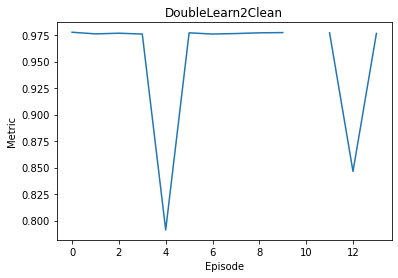

In [22]:
l2c_c1assification1=ql.Qlearner(dataset = d2,goal='CART',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()


Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.17366504669189453 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> Tree -> LOF -> LDA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.10307002067565918 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 3.628129005432129 seconds


>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.8439716312056738

Classification done -- CPU time: 0.49927806854248047 seconds
End Pipeline CPU time: 4.231038331985474 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> LDA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
..


Accuracy of LDA result for 10 cross-validation : 0.8268435972105599

Classification done -- CPU time: 0.4919261932373047 seconds
End Pipeline CPU time: 0.5716390609741211 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> LDA

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.031358957290649414 seconds

>>Classification task
Error: Need at least one continous variable and 10 observations for classification
Classification done -- CPU time: 0.003097057342529297 seconds
End Pipeline CPU time: 0.034729957580566406 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> LC -> LOF -> LDA

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 14412
After deduplication: Number of rows: 14412
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplicatio

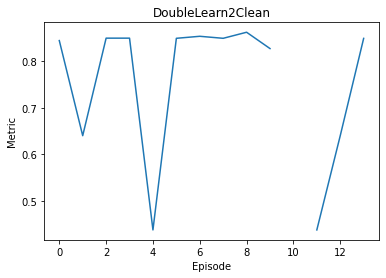

In [23]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='LDA',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.1880788803100586 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> AD -> NB

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.1089029312133789 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 3.6394219398498535 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.3452672429475216

Classification done -- CPU time: 0.1328880786895752 seconds
End Pipeline CPU time: 3.8816192150115967 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> NB

Start pipeline
-------------
>>Normali

Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.1232190132141113 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.4365417479647447

Classification done -- CPU time: 0.1212921142578125 seconds
End Pipeline CPU time: 1.3979401588439941 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> AD -> NB

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 3.5115127563476562 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 2.5740468502044678 s

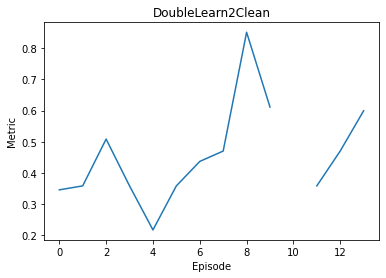

In [24]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='NB',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.512505054473877 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> AD -> LASSO

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.2141730785369873 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 8.125355958938599 seconds


>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.019877588286190274
Regression done -- CPU time: 0.5148122310638428 seconds
End Pipeline CPU time: 8.857777833938599 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> LOF -> LASSO

Start pipeline
-------------
>>Normalizati

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3042.6586126977563, tolerance: 5.543200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2886.502969046492, tolerance: 5.543200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2525.209476533175, tolerance: 5.543200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/line

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 579.970032802858, tolerance: 4.893400000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.16026053814136, tolerance: 4.893400000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154.64420876163845, tolerance: 4.893400000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/line

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.0009025698950504469
Regression done -- CPU time: 0.31306886672973633 seconds
End Pipeline CPU time: 0.4487431049346924 seconds


Strategy# 4 : Greedy traversal for starting state LC
LC -> IQR -> LASSO

Start pipeline
-------------

>>Feature selection 
Before feature selection:
81 features 
Apply LC feature selection with threshold= 0.3
25 features with linear correlation greater than 0.30.

List of correlated variables to be removed : ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'MSSubClass', 'MasVnrArea', 'OpenPorchSF', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'SaleCondition', 'New_ID']
After feature selection:
56 features remain
['YrSold', 'Condition1', 'LotShape', 'BsmtExposure', 'PavedDrive', 'ExterCond', 'LotConfi

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3042.6586126977563, tolerance: 5.543200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2886.502969046492, tolerance: 5.543200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2525.209476533175, tolerance: 5.543200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/line

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.0009025698950504469
Regression done -- CPU time: 0.2749459743499756 seconds
End Pipeline CPU time: 0.3441190719604492 seconds


Strategy# 6 : Greedy traversal for starting state ZSB
ZSB -> Tree -> IQR -> LASSO

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
1057 outlying rows have been removed:
* For test dataset
146 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.08832097053527832 seconds


>>Outlier detection and removal:
* For train dataset
7415 outlying rows have been removed
* For test dataset
1519 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.06023001670837402 seconds


>>Regression task


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2653.856737426173, tolerance: 4.6235
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2551.4962474787408, tolerance: 4.6235
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2272.5624375056304, tolerance: 4.6235
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.0009773969405583963
Regression done -- CPU time: 0.22061610221862793 seconds
End Pipeline CPU time: 0.3698577880859375 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> LASSO

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 3.8622448444366455 seconds


>>Regression task


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7408.915463074337, tolerance: 10.971400000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6349.473465469552, tolerance: 10.971400000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4950.143798421403, tolerance: 10.971400000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/li

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5404.332013085475, tolerance: 9.5976
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4357.00807492356, tolerance: 9.5976
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2766.2233304762894, tolerance: 9.5976
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:52

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.000973954623098573
Regression done -- CPU time: 0.5162909030914307 seconds
End Pipeline CPU time: 4.378812074661255 seconds


Strategy# 8 : Greedy traversal for starting state IQR
IQR -> LASSO

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
7428 outlying rows have been removed
* For test dataset
1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.06440019607543945 seconds


>>Regression task


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3042.6586126977563, tolerance: 5.543200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2886.502969046492, tolerance: 5.543200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2525.209476533175, tolerance: 5.543200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/line

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.0009025698950504469
Regression done -- CPU time: 0.24280667304992676 seconds
End Pipeline CPU time: 0.3072960376739502 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> LASSO

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For test dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

Consistency checking done -- CPU time: 0.07809877395629883 seconds

>>Regression task


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5345.62929148452, tolerance: 10.3338
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4069.6700053078534, tolerance: 10.3338
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3541.504655323164, tolerance: 10.3338
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.26158039793805, tolerance: 9.606200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.34844144399574, tolerance: 9.606200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.186147056747778, tolerance: 9.606200000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/li

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.0003889895437405891
Regression done -- CPU time: 0.4647541046142578 seconds
End Pipeline CPU time: 0.542992115020752 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> ED -> LOF -> LASSO

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.0268709659576416 seconds

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 14412
After deduplication: Number of rows: 14412
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplication done -- CPU time: 0.18143916130065918 seconds


>>Outlier detection and removal:
* For train dataset
Error: Need at least one continous variable forLOF outlier detection
 Dataset inchanged
* For test dataset
Error: Need at least one continous variable forLOF ou

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7408.915463074337, tolerance: 10.971400000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6349.473465469552, tolerance: 10.971400000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4950.143798421403, tolerance: 10.971400000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/li

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7533.094730620386, tolerance: 10.756
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6233.002723154458, tolerance: 10.756
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5064.325530221213, tolerance: 10.756
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:52

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.000973954623098573
Regression done -- CPU time: 0.5670640468597412 seconds
End Pipeline CPU time: 4.548481225967407 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> LASSO

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 4.627498149871826 seconds


>>Regression task


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9879.723265130848, tolerance: 10.985000000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7929.833109251114, tolerance: 10.985000000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5795.532483730394, tolerance: 10.985000000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/li

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319.47994899740263, tolerance: 9.608500000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.8720101103912, tolerance: 9.608500000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.56888431903826, tolerance: 9.608500000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/lin

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.001145092490202051
Regression done -- CPU time: 0.48599696159362793 seconds
End Pipeline CPU time: 5.113573789596558 seconds

Start pipeline
-------------

>>Regression task


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7416.897562488203, tolerance: 10.985000000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6328.168332066744, tolerance: 10.985000000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4946.0601927795215, tolerance: 10.985000000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/l

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7492.1200153060345, tolerance: 10.768500000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6232.455447198038, tolerance: 10.768500000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5059.664000062084, tolerance: 10.768500000000001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/l

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.0009629175225700483
Regression done -- CPU time: 0.543956995010376 seconds
End Pipeline CPU time: 0.5439927577972412 seconds

==== Recap ====

List of strategies tried by DoubleLearn2Clean:
['DS -> AD -> LASSO', 'MM -> LOF -> LASSO', 'ZS -> IQR -> LASSO', 'WR -> IQR -> LASSO', 'LC -> IQR -> LASSO', 'Tree -> IQR -> LASSO', 'ZSB -> Tree -> IQR -> LASSO', 'LOF -> LASSO', 'IQR -> LASSO', 'CC -> LASSO', 'PC -> ED -> LOF -> LASSO', 'ED -> LOF -> LASSO', 'AD -> LASSO']

List of corresponding quality metrics ****
 [{'quality_metric': 0.019877588286190274}, {'quality_metric': 3.256569076277321e-06}, {'quality_metric': 4.704744522501325}, {'quality_metric': 0.0009025698950504469}, {'quality_metric': 3.1912758461639315}, {'quality_metric': 0.0009025698950504469}, {'quality_metric': 0.0009773969405583963}, {'quality_metric': 0.000973954623098573}, {'quality_metric': 0.0009025698950504469}, {'quality_metric': 0.0003889895437405

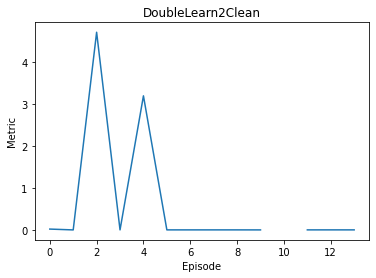

In [49]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='LASSO',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.19476819038391113 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> LOF -> AD -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.11184906959533691 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 3.6036620140075684 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 6.61141300201416 seconds


>>Regression task


const           -0.060178
1stFlrSF        -0.171274
2ndFlrSF        -0.024221
3SsnPorch       -0.030390
BedroomAbvGr     0.023950
BsmtFinSF1       0.049172
BsmtFinSF2       0.107787
BsmtFullBath    -0.047864
BsmtHalfBath     0.006773
BsmtUnfSF        0.093520
EnclosedPorch   -0.070131
Fireplaces       0.025831
FullBath         0.023585
GarageArea       0.067513
GarageCars      -0.085796
GarageYrBlt     -0.043105
GrLivArea        0.046933
HalfBath        -0.000696
Id              -0.015952
KitchenAbvGr    -0.017889
LotArea          0.046476
LotFrontage      0.031339
LowQualFinSF     0.087384
MSSubClass      -0.016263
MasVnrArea      -0.010874
MiscVal         -0.023345
MoSold           0.037822
OpenPorchSF      0.041082
OverallCond     -0.001477
OverallQual      0.017031
PoolArea        -0.164608
SaleCondition    5.118846
ScreenPorch      0.043663
TotRmsAbvGrd    -0.053423
TotalBsmtSF      0.027356
WoodDeckSF       0.047445
YearBuilt       -0.047868
YearRemodAdd    -0.033351
YrSold      

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1,1.0,0.662668,0.000000,0.00000,0.555556,0.868564,0.0,0.000000,0.944444,0.316649,...,0.944444,0.500000,0.0,0.0,0.444444,0.723879,0.893884,0.543210,0.365079,0.333333
2,1.0,0.300985,0.864704,0.00000,0.555556,0.579254,0.0,0.777778,0.000000,0.466648,...,0.333333,0.722222,0.0,0.0,0.444444,0.415278,0.000000,0.750000,0.703704,0.555556
3,1.0,0.353952,0.788209,0.00000,0.555556,0.414793,0.0,0.777778,0.000000,0.556994,...,0.333333,0.722222,0.0,0.0,0.722222,0.212963,0.000000,0.090147,0.311111,0.000000
4,1.0,0.562411,0.903417,0.00000,0.888889,0.696118,0.0,0.777778,0.000000,0.514470,...,0.333333,0.888889,0.0,0.0,0.904762,0.645370,0.795414,0.736111,0.644444,0.555556
5,1.0,0.150112,0.664991,0.95888,0.055556,0.747657,0.0,0.777778,0.000000,0.088889,...,0.333333,0.222222,0.0,0.0,0.166667,0.255675,0.511559,0.654321,0.544444,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,1.0,0.055396,0.661124,0.00000,0.555556,0.000000,0.0,0.000000,0.000000,0.561564,...,0.333333,0.083333,0.0,0.0,0.166667,0.097222,0.000000,0.469136,0.311111,0.000000
2914,1.0,0.055396,0.661124,0.00000,0.555556,0.000000,0.0,0.000000,0.000000,0.561564,...,0.888889,0.083333,0.0,0.0,0.166667,0.097222,0.000000,0.469136,0.311111,0.000000
2916,1.0,0.630106,0.000000,0.00000,0.888889,0.893722,0.0,0.777778,0.000000,0.000000,...,0.888889,0.222222,0.0,0.0,0.722222,0.700751,0.910470,0.333333,0.555556,0.000000
2917,1.0,0.364261,0.000000,0.00000,0.555556,0.478610,0.0,0.000000,0.944444,0.583651,...,0.333333,0.222222,0.0,0.0,0.444444,0.404167,0.576305,0.648148,0.511111,0.000000


(39,)

(2889, 38)

(38,)

(2889, 38)

MODIFICATION
Regression done -- CPU time: 0.07904410362243652 seconds
End Pipeline CPU time: 10.406901359558105 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.06349396705627441 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 6.845659971237183 seconds


>>Regression task


const           -1.516148e-14
1stFlrSF        -3.809453e-15
2ndFlrSF        -1.342676e-15
3SsnPorch       -4.773959e-15
BedroomAbvGr    -7.910339e-16
BsmtFinSF1      -7.077672e-15
BsmtFinSF2      -1.325329e-15
BsmtFullBath     1.512679e-15
BsmtHalfBath     2.775558e-17
BsmtUnfSF        4.043640e-15
EnclosedPorch   -7.029100e-15
Fireplaces       1.429412e-15
FullBath         4.361095e-15
GarageArea       5.800915e-15
GarageCars       5.051515e-15
GarageYrBlt      6.199902e-15
GrLivArea       -2.884845e-15
HalfBath        -1.608956e-15
Id               6.782769e-16
KitchenAbvGr    -2.838008e-15
LotArea          1.344064e-14
LotFrontage      2.067790e-15
LowQualFinSF     2.709638e-15
MSSubClass       2.373102e-15
MasVnrArea      -2.324529e-16
MiscVal          6.161738e-15
MoSold           1.207368e-15
OpenPorchSF     -2.060851e-15
OverallCond      2.029626e-15
OverallQual      1.602884e-15
PoolArea        -4.607426e-15
SaleCondition    5.000000e+00
ScreenPorch     -8.985868e-16
TotRmsAbvG

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,0.109641,0.413559,0.0,0.375,0.125089,0.0,0.333333,0.0,0.064212,...,0.500,0.666667,0.0,0.0,0.461538,0.140098,0.000000,0.949275,0.883333,0.50
1,1.0,0.194917,0.000000,0.0,0.375,0.173281,0.0,0.000000,0.5,0.121575,...,0.875,0.555556,0.0,0.0,0.307692,0.206547,0.209270,0.753623,0.433333,0.25
2,1.0,0.123083,0.419370,0.0,0.375,0.086109,0.0,0.333333,0.0,0.185788,...,0.500,0.666667,0.0,0.0,0.307692,0.150573,0.000000,0.934783,0.866667,0.50
3,1.0,0.131695,0.366102,0.0,0.375,0.038271,0.0,0.333333,0.0,0.231164,...,0.500,0.666667,0.0,0.0,0.384615,0.123732,0.000000,0.311594,0.333333,0.00
4,1.0,0.170342,0.509927,0.0,0.500,0.116052,0.0,0.333333,0.0,0.209760,...,0.500,0.777778,0.0,0.0,0.538462,0.187398,0.134831,0.927536,0.833333,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,0.044528,0.264407,0.0,0.375,0.000000,0.0,0.000000,0.0,0.233733,...,0.750,0.333333,0.0,0.0,0.230769,0.089362,0.000000,0.710145,0.333333,0.00
2915,1.0,0.044528,0.264407,0.0,0.375,0.044649,0.0,0.000000,0.0,0.125856,...,0.500,0.333333,0.0,0.0,0.307692,0.089362,0.000000,0.710145,0.333333,0.00
2916,1.0,0.186936,0.000000,0.0,0.500,0.216867,0.0,0.333333,0.0,0.000000,...,0.750,0.444444,0.0,0.0,0.384615,0.200327,0.332865,0.637681,0.766667,0.00
2917,1.0,0.133585,0.000000,0.0,0.375,0.059709,0.0,0.000000,0.5,0.246147,...,0.500,0.444444,0.0,0.0,0.307692,0.149264,0.056180,0.869565,0.700000,0.00


(39,)

(2919, 38)

(38,)

(2919, 38)

MODIFICATION
Regression done -- CPU time: 0.08789491653442383 seconds
End Pipeline CPU time: 6.998656988143921 seconds


Strategy# 2 : Greedy traversal for starting state ZS
ZS -> IQR -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.10939502716064453 seconds


>>Outlier detection and removal:
* For train dataset
741 outlying rows have been removed
* For test dataset
136 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.06126093864440918 seconds


>>Regression task


const            2.500000e+00
1stFlrSF         5.119603e-16
2ndFlrSF        -9.555074e-16
3SsnPorch        4.712485e-16
BedroomAbvGr    -1.048857e-15
BsmtFinSF1       1.021589e-16
BsmtFinSF2      -2.964073e-16
BsmtFullBath    -1.289008e-15
BsmtHalfBath    -9.667831e-16
BsmtUnfSF        1.703932e-15
EnclosedPorch   -5.679051e-16
Fireplaces      -5.997806e-16
FullBath         6.188626e-16
GarageArea       1.893017e-15
GarageCars      -4.284767e-16
GarageYrBlt      5.352706e-16
GrLivArea       -2.451652e-16
HalfBath         1.000719e-15
Id              -7.938528e-16
KitchenAbvGr    -8.467619e-16
LotArea         -2.344587e-16
LotFrontage      5.138576e-16
LowQualFinSF     4.307806e-16
MSSubClass      -2.511012e-16
MasVnrArea      -8.391725e-17
MiscVal          3.850002e-16
MoSold          -4.347651e-17
OpenPorchSF      5.881255e-16
OverallCond     -1.652758e-15
OverallQual      9.031404e-16
PoolArea        -9.606031e-16
ScreenPorch      4.724818e-16
TotRmsAbvGrd     1.535013e-15
TotalBsmtS

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,-0.773728,1.207172,-0.103313,0.169898,0.581046,-0.292975,1.087148,-0.249676,-0.934005,-0.359539,...,0.646073,-0.063139,-0.285886,0.986680,-0.443002,-0.740634,1.046078,0.896679,0.157619,-1.731161
1,0.261030,-0.784891,-0.103313,0.169898,1.178053,-0.292975,-0.818789,3.821854,-0.629176,-0.359539,...,-0.063174,-0.063139,-0.285886,-0.287709,0.477381,1.614603,0.154737,-0.395536,-0.602858,-1.729974
2,-0.610614,1.235163,-0.103313,0.169898,0.098173,-0.292975,1.087148,-0.249676,-0.287950,-0.359539,...,0.646073,-0.063139,-0.285886,-0.287709,-0.297917,-0.740634,0.980053,0.848819,0.157619,-1.728788
3,-0.506118,0.978574,-0.103313,0.169898,-0.494445,-0.292975,1.087148,-0.249676,-0.046816,3.874303,...,0.646073,-0.063139,-0.285886,0.349486,-0.669697,-0.740634,-1.859033,-0.682695,-1.363335,-1.727601
4,-0.037164,1.671364,-0.103313,1.385418,0.469107,-0.292975,1.087148,-0.249676,-0.160558,-0.359539,...,1.355319,-0.063139,-0.285886,1.623875,0.212148,0.776834,0.947040,0.753100,0.157619,-1.726415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-1.563815,0.488723,-0.103313,0.169898,-0.968539,-0.292975,-0.818789,-0.249676,-0.033167,-0.359539,...,-1.481667,-0.063139,-0.285886,-0.924904,-1.145758,-0.740634,-0.043338,-0.682695,-1.363335,1.726415
2915,-1.563815,0.488723,-0.103313,0.169898,-0.415429,-0.292975,-0.818789,-0.249676,-0.606427,-0.359539,...,-1.481667,-0.063139,-0.285886,-0.287709,-1.145758,-0.740634,-0.043338,-0.682695,-1.363335,1.727601
2916,0.164181,-0.784891,-0.103313,1.385418,1.717993,-0.292975,1.087148,-0.249676,-1.275231,-0.359539,...,-0.772420,-0.063139,-0.285886,0.349486,0.391237,3.005615,-0.373465,0.561660,-1.363335,1.728788
2917,-0.483181,-0.784891,-0.103313,0.169898,-0.228864,-0.292975,-0.818789,3.821854,0.032803,-0.359539,...,-0.772420,-0.063139,-0.285886,-0.287709,-0.316053,-0.108355,0.682939,0.370221,-1.363335,1.729974


(40,)

(2783, 38)

(38,)

(2783, 38)

MODIFICATION
Regression done -- CPU time: 0.06728506088256836 seconds
End Pipeline CPU time: 0.2388780117034912 seconds


Strategy# 3 : Greedy traversal for starting state WR
WR -> ZS -> IQR -> OLS

Start pipeline
-------------

>>Feature selection 
Before feature selection:
81 features 
Apply WR feature selection
Input variables must be non-negative. WR feature selection is only applied to positive variables.
After feature selection:
38 features remain
['YrSold', 'Fireplaces', 'MSSubClass', 'BsmtUnfSF', 'MasVnrArea', 'TotRmsAbvGrd', 'WoodDeckSF', 'LotArea', 'BedroomAbvGr', 'MiscVal', 'EnclosedPorch', 'PoolArea', 'BsmtFinSF1', 'New_ID', 'YearBuilt', 'OpenPorchSF', 'GarageYrBlt', '1stFlrSF', 'OverallCond', 'GarageCars', 'FullBath', 'HalfBath', 'Id', 'GrLivArea', 'MoSold', '2ndFlrSF', 'OverallQual', 'LowQualFinSF', 'BsmtHalfBath', 'ScreenPorch', 'YearRemodAdd', 'LotFrontage', 'GarageArea', 'BsmtFullBath', 'BsmtFinSF2', 'TotalBsmtSF', 'KitchenAbvGr', '3SsnPorch']
Feature selection done --

const            2.500000e+00
1stFlrSF         5.119603e-16
2ndFlrSF        -9.555074e-16
3SsnPorch        4.712485e-16
BedroomAbvGr    -1.048857e-15
BsmtFinSF1       1.021589e-16
BsmtFinSF2      -2.964073e-16
BsmtFullBath    -1.289008e-15
BsmtHalfBath    -9.667831e-16
BsmtUnfSF        1.703932e-15
EnclosedPorch   -5.679051e-16
Fireplaces      -5.997806e-16
FullBath         6.188626e-16
GarageArea       1.893017e-15
GarageCars      -4.284767e-16
GarageYrBlt      5.352706e-16
GrLivArea       -2.451652e-16
HalfBath         1.000719e-15
Id              -7.938528e-16
KitchenAbvGr    -8.467619e-16
LotArea         -2.344587e-16
LotFrontage      5.138576e-16
LowQualFinSF     4.307806e-16
MSSubClass      -2.511012e-16
MasVnrArea      -8.391725e-17
MiscVal          3.850002e-16
MoSold          -4.347651e-17
OpenPorchSF      5.881255e-16
OverallCond     -1.652758e-15
OverallQual      9.031404e-16
PoolArea        -9.606031e-16
ScreenPorch      4.724818e-16
TotRmsAbvGrd     1.535013e-15
TotalBsmtS

,YrSold,Fireplaces,MSSubClass,BsmtUnfSF,MasVnrArea,TotRmsAbvGrd,WoodDeckSF,LotArea,BedroomAbvGr,MiscVal,...,BsmtHalfBath,ScreenPorch,YearRemodAdd,LotFrontage,GarageArea,BsmtFullBath,BsmtFinSF2,TotalBsmtSF,KitchenAbvGr,3SsnPorch
0,0.157619,-0.924153,0.067320,-0.934005,0.528944,0.986680,-0.740634,-0.217841,0.169898,-0.089577,...,-0.249676,-0.285886,0.896679,-0.127656,0.349304,1.087148,-0.292975,-0.443002,-0.207663,-0.103313
1,-0.602858,0.623525,-0.873466,-0.629176,-0.566919,-0.287709,1.614603,-0.072032,0.169898,-0.089577,...,3.821854,-0.285886,-0.395536,0.567028,-0.058981,-0.818789,-0.292975,0.477381,-0.207663,-0.103313
2,0.157619,0.623525,0.067320,-0.287950,0.338845,-0.287709,-0.740634,0.137173,0.169898,-0.089577,...,-0.249676,-0.285886,0.848819,0.011281,0.627680,1.087148,-0.292975,-0.297917,-0.207663,-0.103313
3,-1.363335,0.623525,0.302516,-0.046816,-0.566919,0.349486,-0.740634,-0.078371,0.169898,-0.089577,...,-0.249676,-0.285886,-0.682695,-0.359218,0.785426,1.087148,-0.292975,-0.669697,-0.207663,-0.103313
4,0.157619,0.623525,0.067320,-0.160558,1.389978,1.623875,0.776834,0.518814,1.385418,-0.089577,...,-0.249676,-0.285886,0.753100,0.752277,1.685509,1.087148,-0.292975,0.212148,-0.207663,-0.103313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-1.363335,-0.924153,2.419286,-0.033167,-0.566919,-0.924904,-0.740634,-1.043758,0.169898,-0.089577,...,-0.249676,-0.285886,-0.682695,-2.165397,-2.193199,-0.818789,-0.292975,-1.145758,-0.207663,-0.103313
2915,-1.363335,-0.924153,2.419286,-0.606427,-0.566919,-0.287709,-0.740634,-1.049083,0.169898,-0.089577,...,-0.249676,-0.285886,-0.682695,-2.165397,-0.866272,-0.818789,-0.292975,-1.145758,-0.207663,-0.103313
2916,-1.363335,0.623525,-0.873466,-1.275231,-0.566919,0.349486,3.005615,1.246594,1.385418,-0.089577,...,-0.249676,-0.285886,0.561660,4.272011,0.479213,1.087148,-0.292975,0.391237,-0.207663,-0.103313
2917,-1.363335,-0.924153,0.655311,0.032803,-0.566919,-0.287709,-0.108355,0.034599,0.169898,1.144116,...,3.821854,-0.285886,0.370221,-0.266593,-2.193199,-0.818789,-0.292975,-0.316053,-0.207663,-0.103313


(40,)

(2783, 38)

(38,)

(2783, 38)

MODIFICATION
Regression done -- CPU time: 0.07068705558776855 seconds
End Pipeline CPU time: 0.2270970344543457 seconds


Strategy# 4 : Greedy traversal for starting state LC
LC -> LOF -> AD -> OLS

Start pipeline
-------------

>>Feature selection 
Before feature selection:
81 features 
Apply LC feature selection with threshold= 0.3
25 features with linear correlation greater than 0.30.

List of correlated variables to be removed : ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'MSSubClass', 'MasVnrArea', 'OpenPorchSF', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'SaleCondition', 'New_ID']
After feature selection:
56 features remain
['YrSold', 'Condition1', 'LotShape', 'BsmtExposure', 'PavedDrive', 'ExterCond', 'LotConfig', 'MasVnrType', 'HeatingQC', 'Exterior2nd', 'BsmtFinType1', 'BsmtQual', '

const            109.761352
YrSold            -0.054627
MiscVal           -0.000125
BsmtHalfBath      -0.550347
EnclosedPorch     -0.004209
PoolArea          -0.002879
LowQualFinSF      -0.000709
ScreenPorch       -0.001351
Id                 0.000013
MoSold             0.017692
BsmtFinSF2        -0.000380
2ndFlrSF           0.000503
1stFlrSF           0.001175
3SsnPorch          0.003672
OverallCond        0.182459
dtype: float64

,const,YrSold,MiscVal,EnclosedPorch,PoolArea,1stFlrSF,OverallCond,Id,MoSold,2ndFlrSF,LowQualFinSF,BsmtHalfBath,ScreenPorch,BsmtFinSF2,3SsnPorch
0,1.0,2008.0,0.0,0.0,0.0,856.0,5.0,1.0,2.0,854.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2007.0,0.0,0.0,0.0,1262.0,8.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,2008.0,0.0,0.0,0.0,920.0,5.0,3.0,9.0,866.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2006.0,0.0,272.0,0.0,961.0,5.0,4.0,2.0,756.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2008.0,0.0,0.0,0.0,1145.0,5.0,5.0,12.0,1053.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,2006.0,0.0,0.0,0.0,546.0,7.0,2915.0,6.0,546.0,0.0,0.0,0.0,0.0,0.0
2915,1.0,2006.0,0.0,0.0,0.0,546.0,5.0,2916.0,4.0,546.0,0.0,0.0,0.0,0.0,0.0
2916,1.0,2006.0,0.0,0.0,0.0,1224.0,7.0,2917.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,1.0,2006.0,700.0,0.0,0.0,970.0,5.0,2918.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0


(15,)

(2889, 15)

(15,)

(2889, 15)

MODIFICATION
Regression done -- CPU time: 0.04834294319152832 seconds
End Pipeline CPU time: 6.485558986663818 seconds


Strategy# 5 : Greedy traversal for starting state Tree
Tree -> LOF -> AD -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 3.7070279121398926 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 6.283583164215088 seconds


>>Regression task


const           -7.959633e-12
1stFlrSF        -9.330913e-16
2ndFlrSF        -9.329886e-16
3SsnPorch       -9.812877e-18
BedroomAbvGr     2.004880e-15
BsmtFinSF1       2.654752e-16
BsmtFinSF2       2.109893e-16
BsmtFullBath    -2.533347e-15
BsmtHalfBath    -9.273832e-15
BsmtUnfSF        2.485466e-16
EnclosedPorch    1.035303e-16
Fireplaces      -1.042894e-15
FullBath        -6.442329e-16
GarageArea      -1.671662e-17
GarageCars      -9.540979e-18
GarageYrBlt      1.470449e-18
GrLivArea        9.391196e-16
HalfBath         6.035753e-16
Id               1.337804e-17
KitchenAbvGr    -3.751340e-16
LotArea          1.935935e-17
LotFrontage      2.068285e-17
LowQualFinSF    -9.679732e-16
MSSubClass       1.468145e-16
MasVnrArea      -1.958679e-17
MiscVal         -5.504126e-18
MoSold           7.893791e-15
OpenPorchSF      6.641776e-17
OverallCond     -4.644180e-16
OverallQual      2.593412e-16
PoolArea        -8.271616e-17
ScreenPorch      1.381189e-16
TotRmsAbvGrd    -4.898425e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,5.0,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,8.0,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,5.0,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,5.0,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,5.0,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,7.0,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,5.0,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,7.0,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0


(39,)

(2889, 38)

(38,)

(2889, 38)

MODIFICATION
Regression done -- CPU time: 0.0852200984954834 seconds
End Pipeline CPU time: 10.076408863067627 seconds


Strategy# 6 : Greedy traversal for starting state ZSB
ZSB -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
1057 outlying rows have been removed:
* For test dataset
146 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.07821989059448242 seconds


>>Regression task


const           -2.181366e-12
1stFlrSF         1.175438e-14
2ndFlrSF         1.176974e-14
3SsnPorch        1.280714e-18
BedroomAbvGr     1.266836e-15
BsmtFinSF1       2.621682e-15
BsmtFinSF2       2.629526e-15
BsmtFullBath    -1.683115e-15
BsmtHalfBath    -4.260481e-15
BsmtUnfSF        2.643926e-15
EnclosedPorch    2.455549e-18
Fireplaces       9.291613e-16
FullBath         1.473864e-15
GarageArea       1.812651e-18
GarageCars       1.097213e-16
GarageYrBlt     -2.583450e-17
GrLivArea       -1.176614e-14
HalfBath        -2.719179e-16
Id              -2.336456e-17
KitchenAbvGr     1.259626e-15
LotArea         -1.813157e-18
LotFrontage      1.460370e-17
LowQualFinSF     1.175400e-14
MSSubClass       3.531111e-17
MasVnrArea       3.237360e-18
MiscVal          5.159701e-18
MoSold           3.063169e-15
OpenPorchSF     -2.150871e-17
OverallCond     -1.646361e-16
OverallQual      3.587625e-16
PoolArea        -4.683584e-17
ScreenPorch      2.204657e-17
TotRmsAbvGrd    -7.315112e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0,4
5,1.0,796.0,566.0,320.0,1.0,732.0,0.0,1.0,0.0,64.0,...,5.0,0.0,0.0,5.0,796.0,40.0,1993.0,1995.0,2009.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0,2915
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0,2916
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0,2917
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0,2918


(40,)

(2773, 39)

(39,)

(2773, 39)

MODIFICATION
Regression done -- CPU time: 0.07184696197509766 seconds
End Pipeline CPU time: 0.1502540111541748 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> AD -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 3.397927761077881 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 6.000450134277344 seconds


>>Regression task


const           -7.959633e-12
1stFlrSF        -9.330913e-16
2ndFlrSF        -9.329886e-16
3SsnPorch       -9.812877e-18
BedroomAbvGr     2.004880e-15
BsmtFinSF1       2.654752e-16
BsmtFinSF2       2.109893e-16
BsmtFullBath    -2.533347e-15
BsmtHalfBath    -9.273832e-15
BsmtUnfSF        2.485466e-16
EnclosedPorch    1.035303e-16
Fireplaces      -1.042894e-15
FullBath        -6.442329e-16
GarageArea      -1.671662e-17
GarageCars      -9.540979e-18
GarageYrBlt      1.470449e-18
GrLivArea        9.391196e-16
HalfBath         6.035753e-16
Id               1.337804e-17
KitchenAbvGr    -3.751340e-16
LotArea          1.935935e-17
LotFrontage      2.068285e-17
LowQualFinSF    -9.679732e-16
MSSubClass       1.468145e-16
MasVnrArea      -1.958679e-17
MiscVal         -5.504126e-18
MoSold           7.893791e-15
OpenPorchSF      6.641776e-17
OverallCond     -4.644180e-16
OverallQual      2.593412e-16
PoolArea        -8.271616e-17
ScreenPorch      1.381189e-16
TotRmsAbvGrd    -4.898425e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,5.0,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,8.0,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,5.0,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,5.0,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,5.0,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,7.0,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,5.0,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,7.0,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0


(39,)

(2889, 38)

(38,)

(2889, 38)

MODIFICATION
Regression done -- CPU time: 0.08447599411010742 seconds
End Pipeline CPU time: 9.483417987823486 seconds


Strategy# 8 : Greedy traversal for starting state IQR
IQR -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
7428 outlying rows have been removed
* For test dataset
1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.06621313095092773 seconds


>>Regression task


const            7.048584e-12
1stFlrSF         1.255381e-14
2ndFlrSF         1.251232e-14
3SsnPorch        2.786421e-15
BedroomAbvGr    -8.326673e-16
BsmtFinSF1       4.541181e-16
BsmtFinSF2      -6.787590e-15
BsmtFullBath     2.331468e-15
BsmtHalfBath     5.884182e-15
BsmtUnfSF        4.610705e-16
EnclosedPorch    8.369999e-17
Fireplaces       3.330669e-16
FullBath         2.831069e-15
GarageArea       6.461845e-17
GarageCars      -9.436896e-16
GarageYrBlt      1.994932e-17
GrLivArea       -1.260000e-14
HalfBath         1.457168e-15
Id              -1.029314e-16
KitchenAbvGr    -2.664535e-15
LotArea          9.519295e-17
LotFrontage     -3.729655e-16
LowQualFinSF    -1.285073e-17
MSSubClass      -4.683753e-17
MasVnrArea       4.260915e-17
MiscVal         -1.265050e-17
MoSold          -7.362166e-15
OpenPorchSF      2.168404e-17
OverallCond     -3.747003e-16
OverallQual     -9.089951e-16
PoolArea        -3.553108e-18
ScreenPorch      0.000000e+00
TotRmsAbvGrd    -5.273559e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
2049,1.0,845.0,825.0,0.0,4.0,583.0,0.0,0.0,0.0,242.0,...,7.0,0.0,0.0,7.0,825.0,0.0,1971.0,1971.0,2008.0,2050
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,1.0,1557.0,0.0,0.0,2.0,1141.0,0.0,1.0,0.0,416.0,...,9.0,0.0,0.0,5.0,1557.0,124.0,1999.0,2000.0,2008.0,2033
2523,1.0,1025.0,0.0,0.0,3.0,502.0,0.0,0.0,0.0,513.0,...,5.0,0.0,0.0,6.0,1015.0,127.0,1976.0,1976.0,2007.0,2524
2041,1.0,952.0,860.0,0.0,3.0,0.0,0.0,0.0,0.0,952.0,...,7.0,0.0,0.0,7.0,952.0,144.0,2002.0,2002.0,2008.0,2042
2045,1.0,1625.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1625.0,...,5.0,0.0,0.0,8.0,1625.0,0.0,1965.0,1965.0,2008.0,2046


(40,)

(1329, 39)

(39,)

(1329, 39)

MODIFICATION
Regression done -- CPU time: 0.06744694709777832 seconds
End Pipeline CPU time: 0.13380002975463867 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> OLS

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For test dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

Consistency checking done -- CPU time: 0.06051206588745117 seconds

>>Regression task


const           -4.857559e-12
1stFlrSF        -4.987400e-14
2ndFlrSF        -4.986124e-14
3SsnPorch       -2.414722e-17
BedroomAbvGr    -4.563407e-16
BsmtFinSF1       8.937405e-15
BsmtFinSF2       8.947532e-15
BsmtFullBath     1.604619e-16
BsmtHalfBath    -6.071532e-17
BsmtUnfSF        8.953783e-15
EnclosedPorch    7.303118e-18
Fireplaces       6.036838e-16
FullBath         3.781697e-16
GarageArea      -6.239245e-18
GarageCars       1.051242e-15
GarageYrBlt     -2.497053e-17
GrLivArea        4.988222e-14
HalfBath         6.041175e-16
Id              -1.825901e-17
KitchenAbvGr    -5.433154e-15
LotArea         -7.391474e-18
LotFrontage     -5.204170e-18
LowQualFinSF    -4.976077e-14
MSSubClass       3.232955e-17
MasVnrArea       5.739495e-18
MiscVal         -9.900545e-18
MoSold           2.407525e-15
OpenPorchSF      1.075986e-17
OverallCond      1.720087e-15
OverallQual     -1.723881e-16
PoolArea        -1.182797e-17
ScreenPorch     -2.554651e-18
TotRmsAbvGrd     4.852889e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0,4
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0,2915
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0,2916
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0,2917
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0,2918


(40,)

(2554, 39)

(39,)

(2554, 39)

MODIFICATION
Regression done -- CPU time: 0.07846689224243164 seconds
End Pipeline CPU time: 0.13918018341064453 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> OLS

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.022697925567626953 seconds

>>Regression task
Error: Need at least one continous variable and  10  observations for regression
Regression done -- CPU time: 0.005162954330444336 seconds
End Pipeline CPU time: 0.028105974197387695 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> LC -> LOF -> AD -> OLS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 14412
After deduplication: Number of rows: 14412
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplication done -- CPU time: 0.22930

const            109.761352
YrSold            -0.054627
MiscVal           -0.000125
BsmtHalfBath      -0.550347
EnclosedPorch     -0.004209
PoolArea          -0.002879
LowQualFinSF      -0.000709
ScreenPorch       -0.001351
Id                 0.000013
MoSold             0.017692
BsmtFinSF2        -0.000380
2ndFlrSF           0.000503
1stFlrSF           0.001175
3SsnPorch          0.003672
OverallCond        0.182459
dtype: float64

,const,YrSold,MiscVal,EnclosedPorch,PoolArea,1stFlrSF,OverallCond,Id,MoSold,2ndFlrSF,LowQualFinSF,BsmtHalfBath,ScreenPorch,BsmtFinSF2,3SsnPorch
0,1.0,2008.0,0.0,0.0,0.0,856.0,5.0,1.0,2.0,854.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2007.0,0.0,0.0,0.0,1262.0,8.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,2008.0,0.0,0.0,0.0,920.0,5.0,3.0,9.0,866.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2006.0,0.0,272.0,0.0,961.0,5.0,4.0,2.0,756.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2008.0,0.0,0.0,0.0,1145.0,5.0,5.0,12.0,1053.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,2006.0,0.0,0.0,0.0,546.0,7.0,2915.0,6.0,546.0,0.0,0.0,0.0,0.0,0.0
2915,1.0,2006.0,0.0,0.0,0.0,546.0,5.0,2916.0,4.0,546.0,0.0,0.0,0.0,0.0,0.0
2916,1.0,2006.0,0.0,0.0,0.0,1224.0,7.0,2917.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,1.0,2006.0,700.0,0.0,0.0,970.0,5.0,2918.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0


(15,)

(2889, 15)

(15,)

(2889, 15)

MODIFICATION
Regression done -- CPU time: 0.0497891902923584 seconds
End Pipeline CPU time: 6.231003761291504 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> OLS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 5.789244174957275 seconds


>>Regression task


const           -1.076339e-11
1stFlrSF        -8.377194e-16
2ndFlrSF        -8.354405e-16
3SsnPorch        1.984090e-17
BedroomAbvGr     1.531761e-15
BsmtFinSF1       1.632890e-15
BsmtFinSF2       1.622935e-15
BsmtFullBath    -3.089543e-15
BsmtHalfBath    -2.255141e-15
BsmtUnfSF        1.638776e-15
EnclosedPorch    4.895850e-17
Fireplaces      -3.157197e-16
FullBath         7.188260e-16
GarageArea      -2.021359e-17
GarageCars      -1.526557e-16
GarageYrBlt     -3.006120e-17
GrLivArea        8.066905e-16
HalfBath         8.430756e-16
Id               2.712708e-17
KitchenAbvGr    -3.035766e-16
LotArea          1.150906e-18
LotFrontage      3.203817e-17
LowQualFinSF    -8.428554e-16
MSSubClass       7.998702e-17
MasVnrArea      -1.566503e-17
MiscVal         -8.422896e-18
MoSold           8.449838e-15
OpenPorchSF      7.624652e-17
OverallCond     -1.168770e-15
OverallQual      9.189698e-16
PoolArea        -1.293589e-17
ScreenPorch     -5.748982e-17
TotRmsAbvGrd    -1.058181e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,5.0,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,8.0,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,5.0,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,5.0,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,5.0,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,7.0,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,5.0,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,7.0,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0


(39,)

(2919, 38)

(38,)

(2919, 38)

MODIFICATION
Regression done -- CPU time: 0.08485031127929688 seconds
End Pipeline CPU time: 5.874332904815674 seconds

Start pipeline
-------------

>>Regression task


const           -1.576517e-12
1stFlrSF         1.672782e-14
2ndFlrSF         1.671873e-14
3SsnPorch       -2.950385e-17
BedroomAbvGr     7.988402e-16
BsmtFinSF1       1.282374e-16
BsmtFinSF2       1.571187e-16
BsmtFullBath    -5.828671e-16
BsmtHalfBath    -3.053113e-15
BsmtUnfSF        1.371751e-16
EnclosedPorch    2.226003e-17
Fireplaces      -1.238593e-15
FullBath        -1.877404e-15
GarageArea      -4.587530e-18
GarageCars      -2.498002e-16
GarageYrBlt      2.737610e-17
GrLivArea       -1.670573e-14
HalfBath        -3.820728e-16
Id              -3.247863e-17
KitchenAbvGr    -1.974115e-15
LotArea          2.733455e-18
LotFrontage     -4.087442e-17
LowQualFinSF     1.670822e-14
MSSubClass      -2.799952e-17
MasVnrArea      -1.393877e-17
MiscVal         -9.488463e-18
MoSold          -6.288373e-17
OpenPorchSF     -3.821813e-18
OverallCond      5.756571e-16
OverallQual      3.295975e-16
PoolArea        -3.608360e-18
ScreenPorch     -5.986151e-17
TotRmsAbvGrd     5.689893e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0,4
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0,2915
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0,2916
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0,2917
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0,2918


(40,)

(2919, 39)

(39,)

(2919, 39)

MODIFICATION
Regression done -- CPU time: 0.0924067497253418 seconds
End Pipeline CPU time: 0.09258604049682617 seconds

==== Recap ====

List of strategies tried by DoubleLearn2Clean:
['DS -> LOF -> AD -> OLS', 'MM -> AD -> OLS', 'ZS -> IQR -> OLS', 'WR -> ZS -> IQR -> OLS', 'LC -> LOF -> AD -> OLS', 'Tree -> LOF -> AD -> OLS', 'ZSB -> OLS', 'LOF -> AD -> OLS', 'IQR -> OLS', 'CC -> OLS', 'PC -> OLS', 'ED -> LC -> LOF -> AD -> OLS', 'AD -> OLS']

List of corresponding quality metrics ****
 [{'quality_metric': 2.914362386997762}, {'quality_metric': 2.9168690583581984}, {'quality_metric': 2.890431130094155}, {'quality_metric': 2.890431130094155}, {'quality_metric': 2.917693234491952}, {'quality_metric': 2.915198054232061}, {'quality_metric': 2.826582084926731}, {'quality_metric': 2.915198054232061}, {'quality_metric': 2.7518015032088234}, {'quality_metric': 2.934684123135462}, {'quality_metric': None}, {'quality_metric': 2.917693234491952}, {'quality_metric': 2.9168690583581984}, {'quali

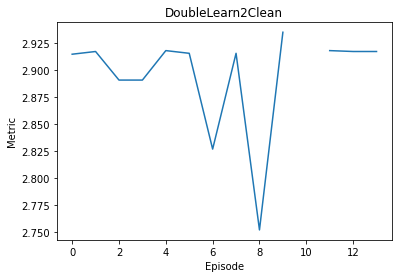

In [51]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='OLS',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.18890810012817383 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> ZSB -> AD -> MARS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.10548186302185059 seconds


>>Outlier detection and removal:
* For train dataset
1 outlying rows have been removed:
* For test dataset
0 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.07524800300598145 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 4.0295469760894775 seconds


>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.15051058635237896
Regression done

MSE of MARS with 10 folds for cross-validation: 0.07818112787269241
Regression done -- CPU time: 5.557923078536987 seconds
End Pipeline CPU time: 5.620262861251831 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> MARS

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For test dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

Consistency checking done -- CPU time: 0.061044931411743164 seconds

>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.07798734237130053
Regression done -- CPU time: 5.840485095977783 seconds
End Pipeline CPU time: 5.901641845703125 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> IQR -> MARS

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CP

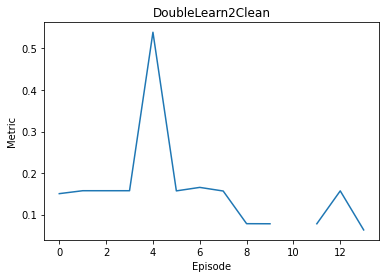

In [26]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='MARS',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.4572451114654541 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> HCA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.24396181106567383 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.09041380882263184 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.2244  for k= 2
Quality of clustering 0.2244
Clustering done -- CPU time: 57.40008091926575 seconds
End Pipeline CPU time: 57.79069209098816 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> LC -> ZS -> IQR -> HCA

Start pipeline
-------------
>>Normalization 
* For tra

... test dataset
Normalization done -- CPU time: 0.08639907836914062 seconds


>>Outlier detection and removal:
* For train dataset
425 outlying rows have been removed
* For test dataset
93 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.048959970474243164 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.3265  for k= 2
Quality of clustering 0.3265
Clustering done -- CPU time: 47.19290614128113 seconds
End Pipeline CPU time: 47.460386991500854 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> AD -> HCA

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 4.049453020095825 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* 

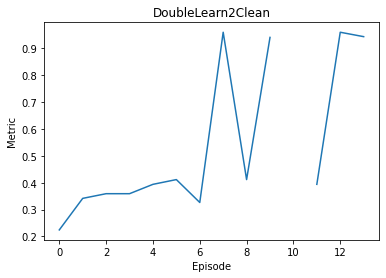

In [47]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='HCA',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.46115732192993164 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> LOF -> KMEANS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.17512106895446777 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 6.794858694076538 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.1544  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.1544
Clustering done -- CPU time: 14.486860990524292 seconds
End Pipeline CPU time: 21.49611806869507 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> LOF -> KMEANS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.10045886039733887 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 5.814516067504883 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.1825  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.1825
Clustering done -- CPU time: 17.091223001480103 seconds
End Pipeline CPU time: 23.044766902923584 seconds


Strategy# 2 : Greedy traversal for starting state ZS
ZS -> AD -> KMEANS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.13038110733032227 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 6.899654865264893 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.165  for k= 3


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.1633
Clustering done -- CPU time: 14.2726731300354 seconds
End Pipeline CPU time: 21.30876922607422 seconds


Strategy# 3 : Greedy traversal for starting state WR
WR -> LOF -> KMEANS

Start pipeline
-------------

>>Feature selection 
Before feature selection:
81 features 
Apply WR feature selection
Input variables must be non-negative. WR feature selection is only applied to positive variables.
After feature selection:
38 features remain
['YrSold', 'Fireplaces', 'MSSubClass', 'BsmtUnfSF', 'MasVnrArea', 'TotRmsAbvGrd', 'WoodDeckSF', 'LotArea', 'BedroomAbvGr', 'MiscVal', 'EnclosedPorch', 'PoolArea', 'BsmtFinSF1', 'New_ID', 'YearBuilt', 'OpenPorchSF', 'GarageYrBlt', '1stFlrSF', 'OverallCond', 'GarageCars', 'FullBath', 'HalfBath', 'Id', 'GrLivArea', 'MoSold', '2ndFlrSF', 'OverallQual', 'LowQualFinSF', 'BsmtHalfBath', 'ScreenPorch', 'YearRemodAdd', 'LotFrontage', 'GarageArea', 'BsmtFullBath', 'BsmtFinSF2', 'TotalBsmtSF', 'KitchenAbvGr', '3SsnPorch']
Feature selectio

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.7822  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.7822
Clustering done -- CPU time: 14.404351949691772 seconds
End Pipeline CPU time: 19.13960599899292 seconds


Strategy# 4 : Greedy traversal for starting state LC
LC -> LOF -> KMEANS

Start pipeline
-------------

>>Feature selection 
Before feature selection:
81 features 
Apply LC feature selection with threshold= 0.3
25 features with linear correlation greater than 0.30.

List of correlated variables to be removed : ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'MSSubClass', 'MasVnrArea', 'OpenPorchSF', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'SaleCondition', 'New_ID']
After feature selection:
56 features remain
['YrSold', 'Condition1', 'LotShape', 'BsmtExposure', 'PavedDrive', 'ExterCond', 'LotConfig', 'MasVnrType', 'HeatingQC', 'Exterior2nd', 'BsmtFinType1', 'B

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.4542  for k= 3


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.4542
Clustering done -- CPU time: 13.598258018493652 seconds
End Pipeline CPU time: 14.27145504951477 seconds


Strategy# 5 : Greedy traversal for starting state Tree
Tree -> DS -> LOF -> KMEANS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.11244511604309082 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 4.545802116394043 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.1544  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.1544
Clustering done -- CPU time: 13.844316959381104 seconds
End Pipeline CPU time: 18.5048828125 seconds


Strategy# 6 : Greedy traversal for starting state ZSB
ZSB -> KMEANS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
1057 outlying rows have been removed:
* For test dataset
146 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.080535888671875 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.828  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.828
Clustering done -- CPU time: 14.000895977020264 seconds
End Pipeline CPU time: 14.118092060089111 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> KMEANS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 4.853806972503662 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.7822  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.7822
Clustering done -- CPU time: 13.82068395614624 seconds
End Pipeline CPU time: 18.680316925048828 seconds


Strategy# 8 : Greedy traversal for starting state IQR
IQR -> KMEANS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
7428 outlying rows have been removed
* For test dataset
1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.06770110130310059 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.4253  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.4253
Clustering done -- CPU time: 4.421782970428467 seconds
End Pipeline CPU time: 4.49020528793335 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> KMEANS

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For test dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

Consistency checking done -- CPU time: 0.10533618927001953 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.7668  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.7668
Clustering done -- CPU time: 10.656607151031494 seconds
End Pipeline CPU time: 10.766945123672485 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> KMEANS

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.03783822059631348 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Error: There are too few observations
Quality of clustering None
Clustering done -- CPU time: 0.002582073211669922 seconds
End Pipeline CPU time: 0.04063296318054199 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> WR -> LOF -> KMEANS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 14412
After deduplication: Number of rows: 14412
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Nu

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.7822  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.7822
Clustering done -- CPU time: 13.394935607910156 seconds
End Pipeline CPU time: 18.424535989761353 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> KMEANS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 3.3816869258880615 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.8543  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.8543
Clustering done -- CPU time: 13.773989200592041 seconds
End Pipeline CPU time: 17.1605281829834 seconds

Start pipeline
-------------

>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 

Best silhouette = 0.7822  for k= 2


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Quality of clustering 0.7822
Clustering done -- CPU time: 13.89186716079712 seconds
End Pipeline CPU time: 13.891957998275757 seconds

==== Recap ====

List of strategies tried by DoubleLearn2Clean:
['DS -> LOF -> KMEANS', 'MM -> LOF -> KMEANS', 'ZS -> AD -> KMEANS', 'WR -> LOF -> KMEANS', 'LC -> LOF -> KMEANS', 'Tree -> DS -> LOF -> KMEANS', 'ZSB -> KMEANS', 'LOF -> KMEANS', 'IQR -> KMEANS', 'CC -> KMEANS', 'PC -> KMEANS', 'ED -> WR -> LOF -> KMEANS', 'AD -> KMEANS']

List of corresponding quality metrics ****
 [{'quality_metric': 0.1544, 'result': {'train':        1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0      0.164319  0.863879        0.0      0.500000    0.724226         0.0   
1      0.640432  0.000000        0.0      0.500000    0.818035         0.0   
2      0.214397  0.868799        0.0      0.500000    0.637476         0.0   
3      0.288462  0.823698        0.0      0.500000    0.514860         0.0   
4      0.542373  0.902222        0.0      0.

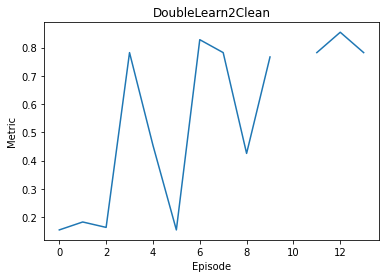

In [45]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='KMEANS',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

## Random data preprocessing pipelines

In [3]:
import learn2clean.loading.reader as rd 
import learn2clean.qlearning.qlearner as ql
import learn2clean.imputation.imputer as imp

# the results of learn2clean cleaning are stored in 'house_example'_results.txt in 'save' directory

d_not_enc = rd.Reader(sep=',',verbose=True, encoding=False) 
house  = ["../datasets/house/house_train.csv","../datasets/house/test.csv"]
dataset= d_not_enc.train_test_split(house, 'SalePrice')
  
# not exhaustively
dataset['train']['YrSold'] = dataset['train']['YrSold'].astype('object')
dataset['train']['YearBuilt'] = dataset['train']['YearBuilt'].astype('object')
dataset['train']['MoSold'] = dataset['train']['MoSold'].astype('object')
dataset['train']['MiscVal'] = dataset['train']['MiscVal'].astype('object')
dataset['train']['GarageYrBlt'] = dataset['train']['GarageYrBlt'].astype('object')
dataset['train']['YearRemodAdd'] = dataset['train']['YearRemodAdd'].astype('object')
dataset['test']

# according to the profiling of House dataset:
#               missing_fraction
# PoolQC                 0.995205
# MiscFeature            0.963014
# Alley                  0.937671
# Fence                  0.807534

# the dataframes train and test will be empty for many leanr2clean episodes
# returning None for accuracy
print(len(dataset['train'].dropna()), len(dataset['test'].dropna()))
# for this particular case, we can impute data first and then run leanr2clean
d1 = imp.Imputer(dataset.copy(), strategy = 'MF',verbose=False).transform()
print(len(d1['train'].dropna()), len(d1['test'].dropna()))

# the results of random cleaning are stored in 'house_example2'_results_file.txt in 'save' directory
# appended to the EOF 

random4=ql.Qlearner(d1,goal='CART',target_goal='SalePrice',target_prepare=None, verbose = False)
random4.random_cleaning('house_example2')

random5=ql.Qlearner(d1,goal='LDA',target_goal='SalePrice',target_prepare=None, verbose = False)
random5.random_cleaning('house_example2')

random6=ql.Qlearner(d1,goal='NB',target_goal='SalePrice',target_prepare=None, verbose = False)
random6.random_cleaning('house_example2')

#random preprocessing pipeline for LASSO regression
random1=ql.Qlearner(d1,goal='LASSO',target_goal='SaleCondition',target_prepare=None, verbose = False)
random1.random_cleaning('house_example2')

#random preprocessing pipeline for OLS regression
random2=ql.Qlearner(d1,goal='OLS',target_goal='SalePrice',target_prepare=None, verbose = True)
random2.random_cleaning('house_example2')

#random preprocessing pipeline for MARS regression
random3=ql.Qlearner(d1,goal='MARS',target_goal='SalePrice',target_prepare=None, verbose = False)
random3.random_cleaning('house_example2')


random7=ql.Qlearner(d1,goal='HCA',target_goal='SalePrice',target_prepare=None, verbose = False)
random7.random_cleaning('house_example2')

random8=ql.Qlearner(d1,goal='KMEANS',target_goal='SalePrice',target_prepare=None, verbose = False)
random8.random_cleaning('house_example2')



Reading csv : house_train.csv ...
Reading data ...
CPU time: 5.20720100402832 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272
8  

Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64                 15.0               304.0     

0 0
>>Imputation 
* For train dataset
Before imputation:
Total 63868 missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC']
- 2356 numerical missing values in ['LotFrontage', 'MasVnrArea']
- 61512 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
After imputation:
Total 0 missing values
- 0 numerical missing values
- 0 non-numerical missing values
* For test dataset
Before imputation:
Total 13964 missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'B

ValueError: Target variable invalid.

In [30]:
# no preprocessing for regression: results appended to the EOF 'house_example2'_results.txt 

no_prep1=ql.Qlearner(d1,goal='LASSO',target_goal='SalePrice',target_prepare=None, verbose = False)
no_prep1.no_prep('house_example2')

no_prep2=ql.Qlearner(d1,goal='OLS',target_goal='SalePrice',target_prepare=None, verbose = False)
no_prep2.no_prep('house_example2')

no_prep3=ql.Qlearner(d1,goal='MARS',target_goal='SalePrice',target_prepare=None, verbose = False)
no_prep3.no_prep('house_example2')


Start pipeline
-------------

>>Regression task


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6662793656200.309, tolerance: 61872616818.6836
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6659845675539.281, tolerance: 61872616818.6836
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6657113081977.504, tolerance: 61872616818.6836
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_m

/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8238585840312.303, tolerance: 61287471582.3693
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8231074762781.391, tolerance: 61287471582.3693
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8296181692505.796, tolerance: 59112859933.3648
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_m

Best alpha =  1.0
MSE of LASSO with 10  folds for cross-validation: 3005502470.9537997
Regression done -- CPU time: 1.1655669212341309 seconds
End Pipeline CPU time: 1.165607213973999 seconds

Start pipeline
-------------

>>Regression task


/Users/yassie/opt/anaconda3/envs/dl2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8790735168974.205, tolerance: 67082655846.676
  positive)


const           -1.100712e+06
1stFlrSF         2.067549e+01
2ndFlrSF         1.859027e+01
3SsnPorch        4.948602e+01
BedroomAbvGr    -1.360282e+04
BsmtFinSF1       1.610121e+01
BsmtFinSF2      -8.489653e-01
BsmtFullBath     4.285447e+03
BsmtHalfBath     2.759055e+03
BsmtUnfSF       -2.930907e+00
EnclosedPorch   -1.507132e+00
Fireplaces       2.399477e+03
FullBath         2.727024e+03
GarageArea      -6.860477e+00
GarageCars       9.211606e+03
GarageYrBlt      2.000363e+02
GrLivArea        2.952093e+01
HalfBath        -1.059018e+03
Id              -9.571961e-01
KitchenAbvGr    -1.719548e+04
LotArea          2.710233e-01
LotFrontage      9.197215e+01
LowQualFinSF    -9.744832e+00
MSSubClass      -1.441078e+02
MasVnrArea       4.512331e+01
MiscVal         -1.274172e-01
MoSold          -6.752823e+02
OpenPorchSF     -2.480270e+01
OverallCond      3.587869e+03
OverallQual      1.582209e+04
PoolArea         1.406174e+02
ScreenPorch      5.264413e+01
TotRmsAbvGrd     6.364085e+03
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0,4
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0,2915
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0,2916
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0,2917
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0,2918


(39,)

(2919, 39)

(39,)

(2919, 39)

MODIFICATION
Regression done -- CPU time: 0.09892106056213379 seconds
End Pipeline CPU time: 0.09900999069213867 seconds

Start pipeline
-------------

>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.18268983831163207
Regression done -- CPU time: 38.93838596343994 seconds
End Pipeline CPU time: 38.93842172622681 seconds


In [31]:
# no preprocessing for classification: results appended to the EOF 'house_example2'_results.txt 

no_prep1=ql.Qlearner(d2,goal='CART',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep1.no_prep('house_example2')

no_prep2=ql.Qlearner(d2,goal='LDA',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep2.no_prep('house_example2')

no_prep3=ql.Qlearner(d2,goal='NB',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep3.no_prep('house_example2')

no_prep4=ql.Qlearner(d2,goal='LASSO',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep4.no_prep('house_example2')

no_prep5=ql.Qlearner(d2,goal='OLS',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep5.no_prep('house_example2')

no_prep6=ql.Qlearner(d2,goal='MARS',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep6.no_prep('house_example2')

no_prep7=ql.Qlearner(d2,goal='HCA',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep7.no_prep('house_example2')

no_prep8=ql.Qlearner(d2,goal='KMEANS',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep8.no_prep('house_example2')


Start pipeline
-------------

>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.976546905995509

Classification done -- CPU time: 191.56323289871216 seconds
End Pipeline CPU time: 191.57932090759277 seconds

Start pipeline
-------------

>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.8486677768526228

Classification done -- CPU time: 0.605820894241333 seconds
End Pipeline CPU time: 0.6059279441833496 seconds

Start pipeline
-------------

>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.5992948243485559

Classification done -- CPU time: 0.12916803359985352 seconds
End Pipeline CPU time: 0.12932801246643066 seconds
